<a href="https://colab.research.google.com/github/teng10/ml_toric_code/blob/main/notebooks/DM_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-up

In [1]:
! git clone https://github.com/teng10/ml_toric_code.git

Cloning into 'ml_toric_code'...
remote: Enumerating objects: 582, done.
remote: Counting objects: 100% (237/237), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 582 (delta 169), reused 147 (delta 87), pack-reused 345
Receiving objects: 100% (582/582), 691.25 KiB | 3.51 MiB/s, done.
Resolving deltas: 100% (373/373), done.


In [2]:
from ml_toric_code import utils

In [3]:
# Load the dataset with id 10331255
# Link: https://drive.google.com/file/d/1pIdqtE137oLBKq-EmNkpxA_xyH6MxgLB/view?usp=sharing
!gdown "1pIdqtE137oLBKq-EmNkpxA_xyH6MxgLB&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1pIdqtE137oLBKq-EmNkpxA_xyH6MxgLB&confirm=t
To: /content/data_public.zip
100% 485M/485M [00:10<00:00, 44.9MB/s]


In [4]:
!unzip "/content/data_public.zip"

Archive:  /content/data_public.zip
   creating: data_public/
  inflating: __MACOSX/._data_public  
   creating: data_public/opt_est/
  inflating: __MACOSX/data_public/._opt_est  
  inflating: data_public/results_(6, 3)_1_0.p  
  inflating: __MACOSX/data_public/._results_(6, 3)_1_0.p  
  inflating: data_public/results_(6, 3)_1_1.p  
  inflating: __MACOSX/data_public/._results_(6, 3)_1_1.p  
  inflating: data_public/results_(6, 3)_1_2.p  
  inflating: __MACOSX/data_public/._results_(6, 3)_1_2.p  
  inflating: data_public/results_(6, 3)_2_0.p  
  inflating: __MACOSX/data_public/._results_(6, 3)_2_0.p  
  inflating: data_public/results_(6, 3)_2_1.p  
  inflating: __MACOSX/data_public/._results_(6, 3)_2_1.p  
  inflating: data_public/results_(6, 3)_2_2.p  
  inflating: __MACOSX/data_public/._results_(6, 3)_2_2.p  
  inflating: data_public/results_(6, 3)_3_0.p  
  inflating: __MACOSX/data_public/._results_(6, 3)_3_0.p  
  inflating: data_public/results_(6, 3)_3_1.p  
  inflating: __MACOSX/da

#### install libraries

In [5]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 2.5 MB/s eta 0:00:00


In [1]:
! pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Import modules

In [2]:
import numpy as np
import jax
import functools
import pickle
import importlib
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import seaborn
from google.colab import files
import xarray as xr
import scipy
from scipy.interpolate import griddata
from tqdm import tqdm
import itertools
import pandas as pd
import einops
import os.path
import os
import re
import math

#### global plotting parameters

In [3]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 20})

In [4]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [5]:
plt.rcParams['legend.loc'] = 'upper right'
plt.rcParams["legend.markerscale"] = 2.

In [6]:
plt.rcParams['axes.linewidth'] = 5. #set the value globally

In [7]:
# matplotlib.rc('text', usetex=True)
# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

## Wilson loop color map

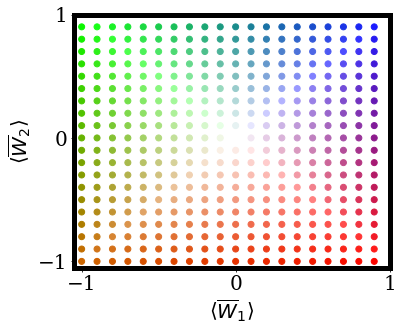

In [8]:
file_path_plots = '/content/drive/MyDrive/Projects/ML_toric_code/Draft/Figures/Figure_TeX draft 2/Fig4/'

key_xy_points = np.array([[0,0],[1,1],[1,-1],[-1,1], [-1,-1]],dtype=float)
key_xy_RGBs = np.array([[1,1,1],[0,0,1], [1,0,0], [0, 1, 0], [0.8,0.4,0.]],dtype=float)
# plt.scatter(key_xy_RGBs)
xydata = np.array([(x,y) for x in np.arange(-1.,1.,0.1) for y in np.arange(-1.,1.,0.1)], dtype=float)
reds = griddata(key_xy_points, key_xy_RGBs.T[0], xydata)
greens = griddata(key_xy_points, key_xy_RGBs.T[1], xydata)
blues = griddata(key_xy_points, key_xy_RGBs.T[2], xydata)

xy_colors_griddata = np.vstack((reds, greens, blues)).T
# fig, ax= plt.figure("2d_colormap_griddata")
fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(xydata.T[0], xydata.T[1], c=xy_colors_griddata)
ax.set_xlabel(r"$\langle \overline{W}_1 \rangle$")
ax.set_ylabel(r"$\langle \overline{W}_2 \rangle$")
ax.set_xticks([-1, 0, 1])
ax.set_xlim([-1.05, 1])
ax.set_yticks([-1, 0, 1])
ax.set_ylim([-1.05, 1])

plt.tight_layout()
# plt.savefig(file_path_plots +  f'w_colorMap.pdf', transparent=True)
# plt.savefig(file_path_plots + "Figs/" + 'DM_eigval_k_h0_T0p1.png')
# files.download(file_path_plots +  f'w_colorMap.pdf')

# Using similarity metric $S_n$


*   More field values
*   Optimization job id: 10331255
* Ensemble id: 11480580



In [14]:
num_T = 3
# h_field_list = [0., 0.475, 0.525, 0.55, 0.575, 0.6, 0.65, 0.7, 1.]
h_field_list = [0., 0.325, 0.4, 0.475, 0.525, 0.55, 0.575, 0.6, 0.65, 0.7, 1.]
T_list = [0.1, 0.3, 1.]
num_spins = 18

## Eigenvalues

In [15]:
data_dir = '/content/data_public/ensemble/11480580/'
file_path_plots = data_dir + 'DMdata/'
date_str = ''
measure_mode = "S"

In [16]:
file_name = date_str + f"{measure_mode}_eigvals.p"
[epsilon_array, eigenvals_dict] = pickle.load( open(file_path_plots+file_name, "rb" ) )

In [17]:
#@title plotting functions
def plt_epsilon_eigenvalue(axes, eigenvals_dict, epsilon_array, num_k=None, ylim=None, vlines=None):
  rows_labels, cols_labels = zip(*eigenvals_dict.keys())
  rows_labels = sorted(set(rows_labels))
  cols_labels = sorted(set(cols_labels))
  for i, T in enumerate(rows_labels):
    for k, h_field in enumerate(cols_labels):
      eigenvals = eigenvals_dict[T, h_field]
      eigenvals = np.flip(eigenvals, axis=1)
      ax = axes[i,k]
      ax.locator_params(axis="both", nbins = 3)
      if num_k is None:
        num_k = eigenvals.shape[1]
      for j in range(num_k):
        ax.scatter(epsilon_array, eigenvals[:, j], s=10, c='k')
        ax.set_xlabel(r"$\epsilon$", fontsize=15)
        ax.set_ylabel(r"$\lambda_k$", fontsize=15)
      if ylim is not None:
        ax.set_ylim(ylim)
      if vlines is not None:
        ax.vlines(x=vlines[0], ymin=ylim[0], ymax=ylim[1], ls='-', lw=2, color='steelblue')
        ax.vlines(x=vlines[1], ymin=ylim[0], ymax=ylim[1], ls='-', lw=2, color='orange')
  pad = 5 # in points
  for ax, row in zip(axes[:,0], rows_labels):
      ax.annotate(f'$T=${row}', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                  xycoords=ax.yaxis.label, textcoords='offset points',
                  size='large', ha='right', va='center', fontsize=15, rotation=90)
  for ax, col in zip(axes[0], cols_labels):
      ax.annotate(f'$h=${col}', xy=(0.5, 1.1), xytext=(0, pad),
                  xycoords='axes fraction', textcoords='offset points',
                  size='large', ha='center', va='baseline', fontsize=15)

def plot_k_eigenvalue(axes, eigenvals_dict, epsilon_array, small_epsilon_list, num_k=20):
  """
  Plot the first k eigenvalue spectrum for different choices of epsilons. 
  """
  round_to_n = lambda x, n: x if x == 0 else round(x, -int(math.floor(math.log10(abs(x)))) + (n - 1))
  round_to_2 = lambda x: round_to_n(x, 2)
  def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx
  rows_labels, cols_labels = zip(*eigenvals_dict.keys()) 
  rows_labels = sorted(set(rows_labels))
  cols_labels = sorted(set(cols_labels))  
  for i, T in enumerate(rows_labels):
    for k, h_field in enumerate(cols_labels):
      eigenvals = eigenvals_dict[T, h_field]
      eigenvals = np.flip(eigenvals, axis=1)
      ax = axes[i,k]
      for epsilon in small_epsilon_list:
        epsilon_val, idx = find_nearest(epsilon_array, epsilon)
        ax.scatter(np.arange(num_k), eigenvals[idx, :num_k], s=10, label=f"$\epsilon=${round_to_2(epsilon_array[idx])}")
        ax.set_xlabel(r"$k$", fontsize=15)
        ax.set_ylabel(r"$\lambda_k$", fontsize=15)
        ax.locator_params(axis="both", nbins = 5)
        ax.legend()
  pad = 5 # in points
  for ax, row in zip(axes[:,0], rows_labels):
      ax.annotate(f'$T=${row}', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                  xycoords=ax.yaxis.label, textcoords='offset points',
                   ha='right', va='center', fontsize=15, rotation=90)
  for ax, col in zip(axes[0], cols_labels):
      ax.annotate(f'$h=${col}', xy=(0.5, 1.1), xytext=(0, pad),
                  xycoords='axes fraction', textcoords='offset points',
                   ha='center', va='baseline', fontsize=15)       

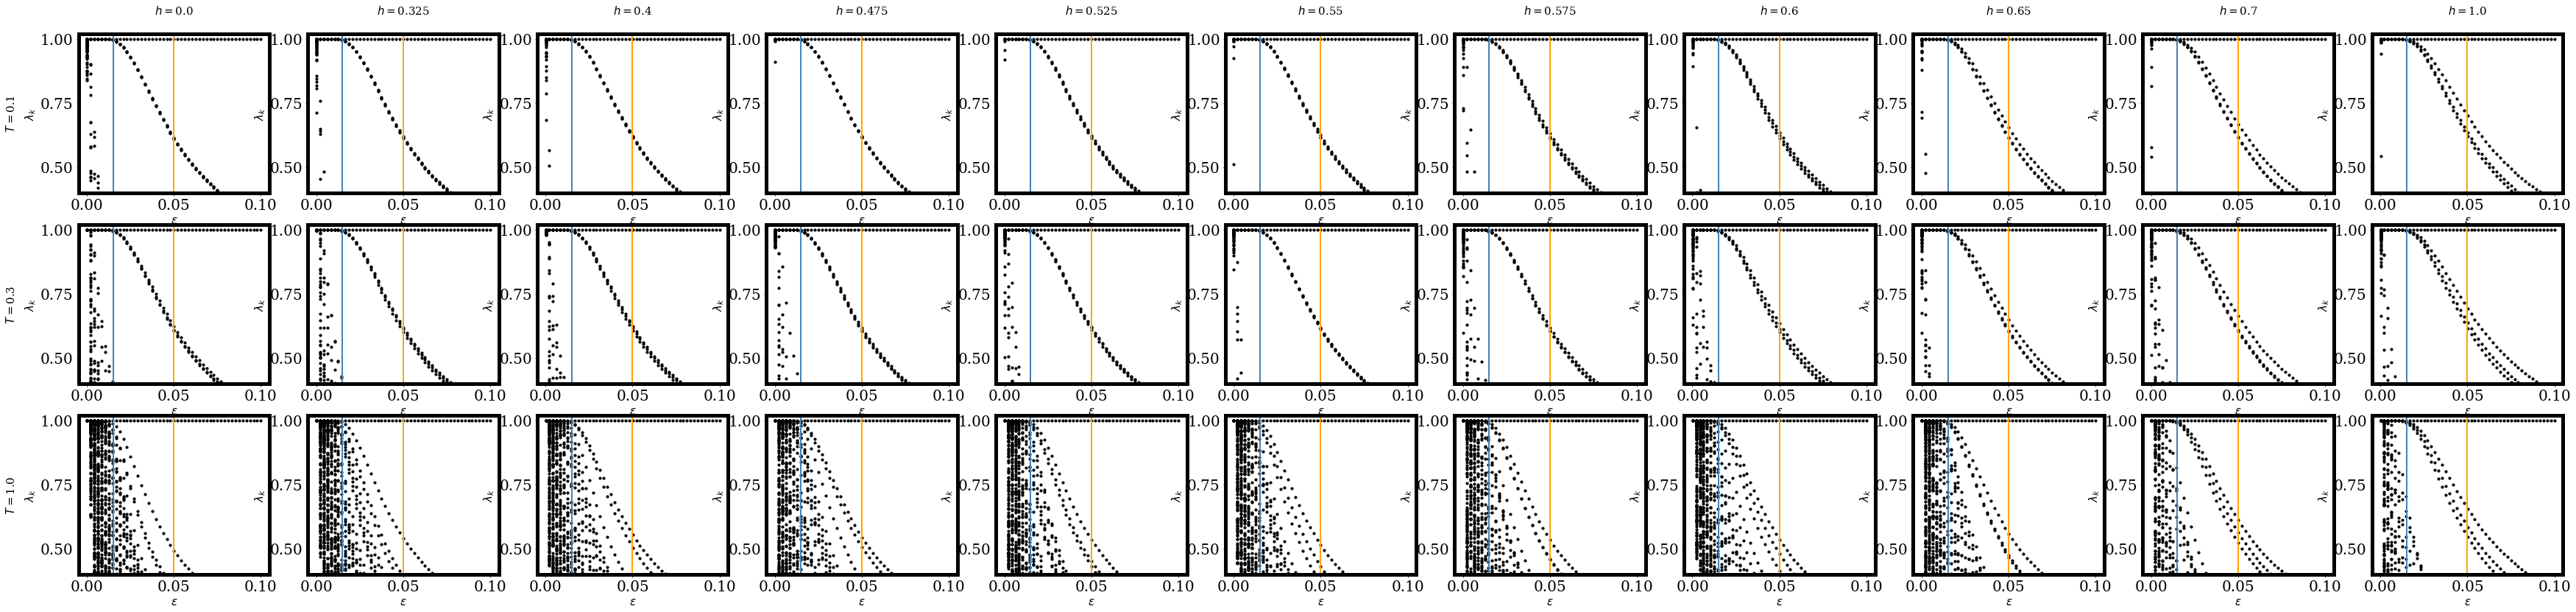

In [18]:
# epsilon_array = np.linspace(1e-4, .04, 50)
fig, axes = plt.subplots(num_T, len(h_field_list), figsize=(5.5 * len(h_field_list), 4.5 * num_T), squeeze=False)
plt_epsilon_eigenvalue(axes, eigenvals_dict, epsilon_array, num_k=200, ylim=[0.4, 1.02], vlines=[0.015, 0.05])

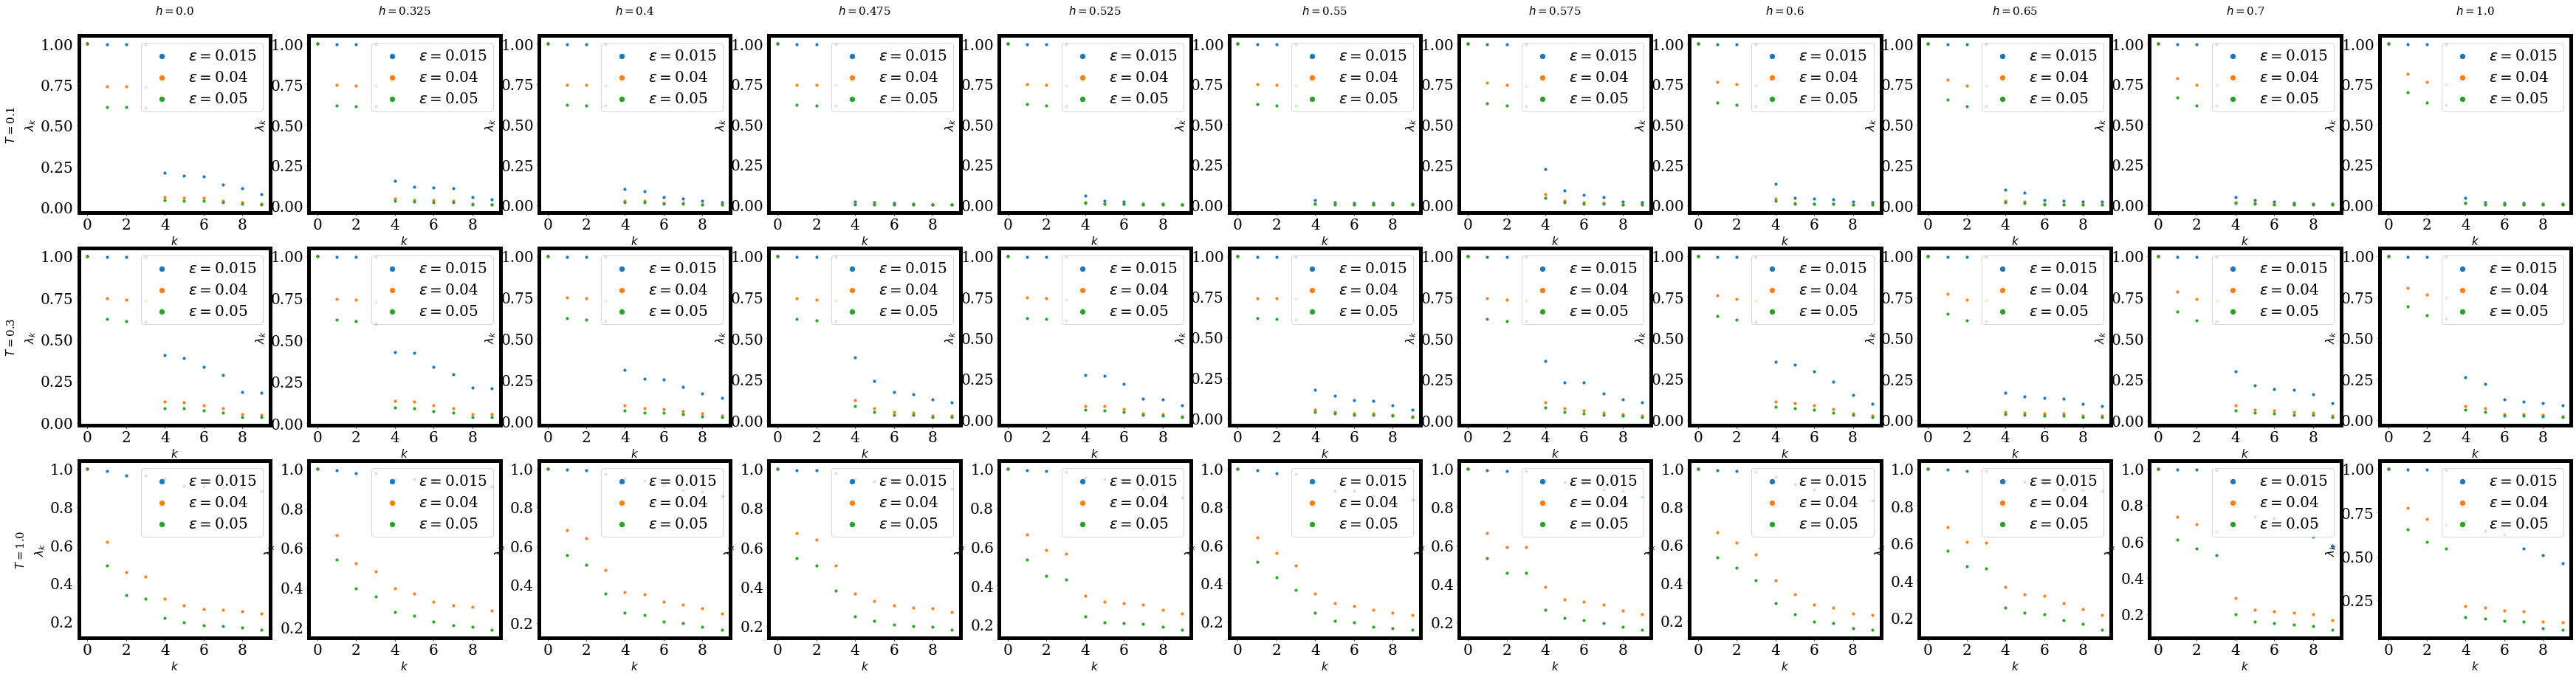

In [19]:
small_epsilon_list = [0.015, 0.04, 0.05]
fig, axes = plt.subplots( num_T, len(h_field_list), figsize=(5.5 * len(h_field_list) , 5 * num_T,), squeeze=False)
plot_k_eigenvalue(axes, eigenvals_dict, epsilon_array, small_epsilon_list, num_k=10)

## Eigenvectors

In [20]:
file_name = date_str + f"{measure_mode}_eigvecs.p"
eigenvecs_dict = pickle.load( open(file_path_plots+file_name, "rb" ) )
# file_name = date_str + f"smat_h{h_field_list[0]}.p"
# S_dict = pickle.load( open(file_path_plots+file_name, "rb" ) )
# file_name = date_str + f"{measure_mode}_kmat.p"
# K_dict = pickle.load( open(file_path_plots+file_name, "rb" ) )
file_name = date_str + f"{measure_mode}_zl.p"
zl_dict = pickle.load( open(file_path_plots+file_name, "rb" ) )
wloop_avg_dict, all_w_color_dict = pickle.load(open(file_path_plots + "w_color_dict.p", "rb"))

In [21]:
#@title helper functions
def kmeans_cluster(projections_dict, n_clusters_dict):
  k_labels_dict = {}
  k_centers_dict = {}
  k_dist_dict = {}
  for key, projections in projections_dict.items():
    n_clusters = n_clusters_dict[key]
    kmeans = KMeans(n_clusters).fit(projections)
    k_labels = kmeans.predict(projections)
    k_labels_dict[key] = k_labels
    k_centers_dict[key] = kmeans.cluster_centers_
    k_dist_dict[key] = kmeans.inertia_
  return k_labels_dict, k_centers_dict, k_dist_dict

def get_color(xydata, ):
  """
  Map 2D wilson loop to color.
  """
  xydata = np.clip(xydata, -1, 1)
  key_xy_points = np.array([[0,0],[1,1],[1,-1],[-1,1], [-1,-1]],dtype=float)
  key_xy_RGBs = np.array([[1,1,1],[0,0,1], [1,0,0], [0, 1, 0], [0.8,0.4,0.]],dtype=float)
  reds = griddata(key_xy_points, key_xy_RGBs.T[0], xydata)
  greens = griddata(key_xy_points, key_xy_RGBs.T[1], xydata)
  blues = griddata(key_xy_points, key_xy_RGBs.T[2], xydata)
  return np.vstack((reds, greens, blues)).T

def plot_kmeans_wloop(axes, all_w_dict, color_dict, epsilon=None):
  rows_labels, cols_labels, _ = zip(*color_dict.keys()) 
  rows_labels = sorted(set(rows_labels))
  cols_labels = sorted(set(cols_labels))
  for i, T in enumerate(rows_labels):  
    for k, h_field in enumerate(cols_labels):
      data = all_w_dict[(T, h_field)]
      ax = axes[i, k]
      if epsilon is None:
        key = (T, h_field)
      else:
        key = (T, h_field, epsilon)
      color = color_dict[key]
      # centers = k_centers_dict[key]
      ax.scatter(data[:, 0], data[:, 1], c=color, edgecolors='grey', linewidths=0.1)
      # ax.scatter(centers[:, 0], centers[:, 1], marker="+", c='r', s=10)
      ax.locator_params(axis="both", nbins = 5)
      ax.set_xlabel("<$\overline{W}_1$>", fontsize=12)
      ax.set_ylabel("<$\overline{W}_2$>", fontsize=12)
  pad = 5.
  for ax, row in zip(axes[:, 0], rows_labels):
    ax.annotate(f"$T=${row}", xy=(0., 0.5), xytext=(-ax.yaxis.labelpad - 15 * pad, 0),
                  xycoords='axes fraction', textcoords='offset points',
                  ha='center', va='center', fontsize=15, rotation=90) 
  for ax, col in zip(axes[0], cols_labels):
    ax.annotate(f'$h=${col}', xy=(0.5, 1.1), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                  ha='center', va='baseline', fontsize=15) 

def plot_dm_eigenvecs(axes, eigenvecs_dict, epsilon,  k_centers_dict=None, color_label_dict=None, edgecolors=None, linewidths=0.5,):
  keys = list(zip(*eigenvecs_dict.keys()))
  rows_labels = keys[0]
  cols_labels = keys[1]
  rows_labels = sorted(set(rows_labels))
  cols_labels = sorted(set(cols_labels))
  k_shift = 1
  for i, T in enumerate(rows_labels):
    for j, h_field in enumerate(cols_labels):
      ax= axes[i, j]
      ax.set_xlabel("$\psi_1$", fontsize=15)
      ax.set_ylabel("$\psi_2$", fontsize=15)      
      ax.locator_params(axis="both", nbins = 5)
      ax.ticklabel_format(axis='both', style='sci', scilimits=(-2, 2))
      eigenvecs_sectors = eigenvecs_dict[(T, h_field, epsilon)]
      eigenvecs_sectors = np.flip(eigenvecs_sectors, axis=1)    
      if color_label_dict is not None:
        c = color_label_dict[T, h_field]
        centers = np.flip(k_centers_dict[(T, h_field, epsilon)], axis=1)
      else:
        c = np.zeros((len(eigenvecs_sectors),))
        centers = np.zeros_like(eigenvecs_sectors)
      # eigens = np.stack([eigenvecs_sectors[:, 0+k_shift], eigenvecs_sectors[:, 1+k_shift]], 1)
      ax.scatter(eigenvecs_sectors[:, 0+k_shift], eigenvecs_sectors[:, 1+k_shift], c=c, edgecolors=edgecolors, linewidths=linewidths)
      if k_centers_dict is not None:
        ax.scatter(centers[:, 0], centers[:, 1], marker="X", c='k', s=60)
  
  pad = 5
  pad = 5 # in points
  for ax, row in zip(axes[:,0], rows_labels):
      ax.annotate(f'$T=${row}', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                  xycoords=ax.yaxis.label, textcoords='offset points',
                   ha='right', va='center', fontsize=15, rotation=90)
  for ax, col in zip(axes[0], cols_labels):
      ax.annotate(f'$h=${col}', xy=(0.5, 1.1), xytext=(0, pad),
                  xycoords='axes fraction', textcoords='offset points',
                   ha='center', va='baseline', fontsize=15)      

In [22]:
n_component_eigvec = 3
k_projections_dict = utils.slice_along_axis(eigenvecs_dict, axis=1, idx=slice(-n_component_eigvec-1, -1))
n_cluster_dict = {k: 4 if k[0]< 0.7 else 1 for k in k_projections_dict.keys()}
k_labels_dict, k_centers_dict, k_dist_dict = kmeans_cluster(k_projections_dict, n_cluster_dict)
wloop_avg_color_dict = {k: get_color(v) for k, v in wloop_avg_dict.items()}

/content/ml_toric_code/utils.py:115: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  arrays, tree_def = jax.tree_flatten(inputs)
/content/ml_toric_code/utils.py:126: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(tree_def, sliced)


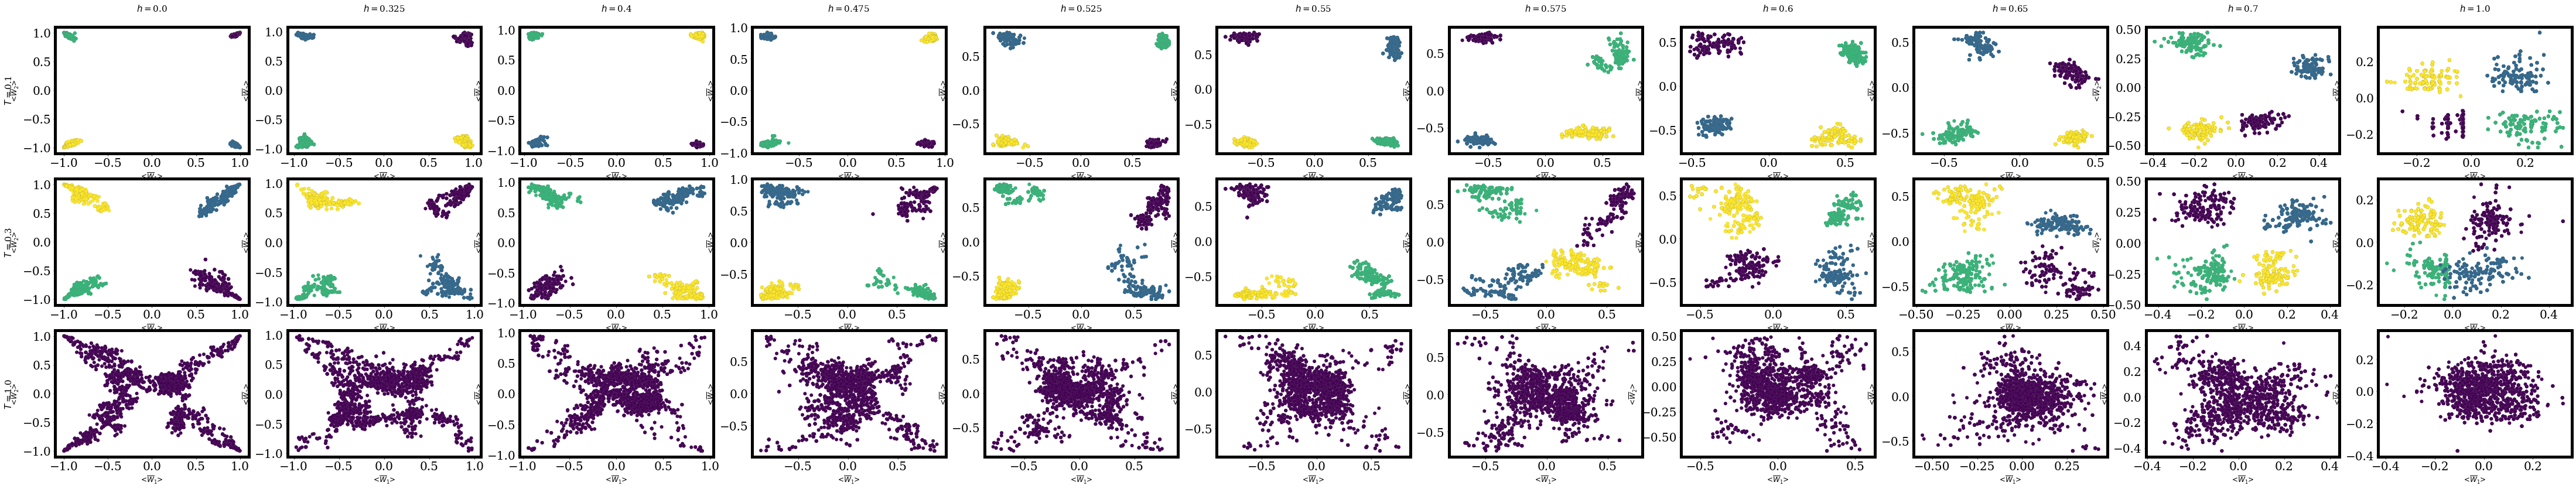

In [23]:
epsilon=0.05
fig, axes = plt.subplots(num_T, len(h_field_list), figsize=(7 *len(h_field_list), 4.5 * num_T), squeeze=False)
plot_kmeans_wloop(axes, wloop_avg_dict, k_labels_dict, epsilon=epsilon)
# plt.suptitle(f"K-means (DM {kernel_name}), $\epsilon={epsilon}$, $n_k$={n_cluster}, $n_\psi$={n_component_eigvec}", fontsize=20, x=0.5, y=1., fontweight=2.5)

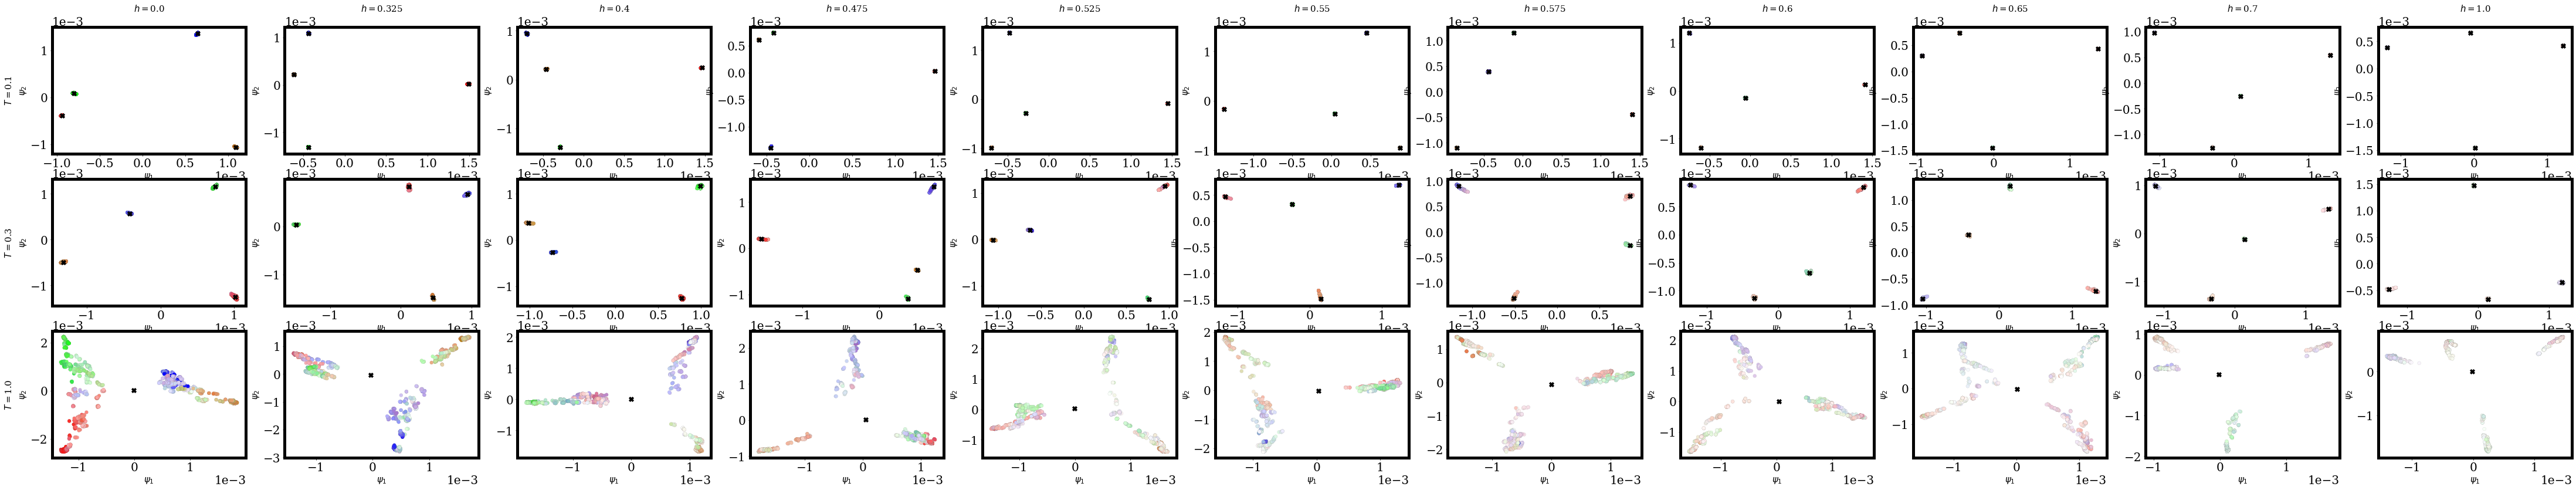

In [24]:
epsilon=0.05
fig, axes = plt.subplots(num_T, len(h_field_list), figsize=(7 * len(h_field_list), 4.5 * num_T,), squeeze=False)
plot_dm_eigenvecs(axes, eigenvecs_dict, epsilon, k_centers_dict, wloop_avg_color_dict, edgecolors='grey', linewidths=0.1 )
# fig.suptitle(f"Eigenvectors for $\epsilon=${epsilon}, $n_k$={n_cluster}, $n_\psi$={n_component_eigvec}", fontsize=20)

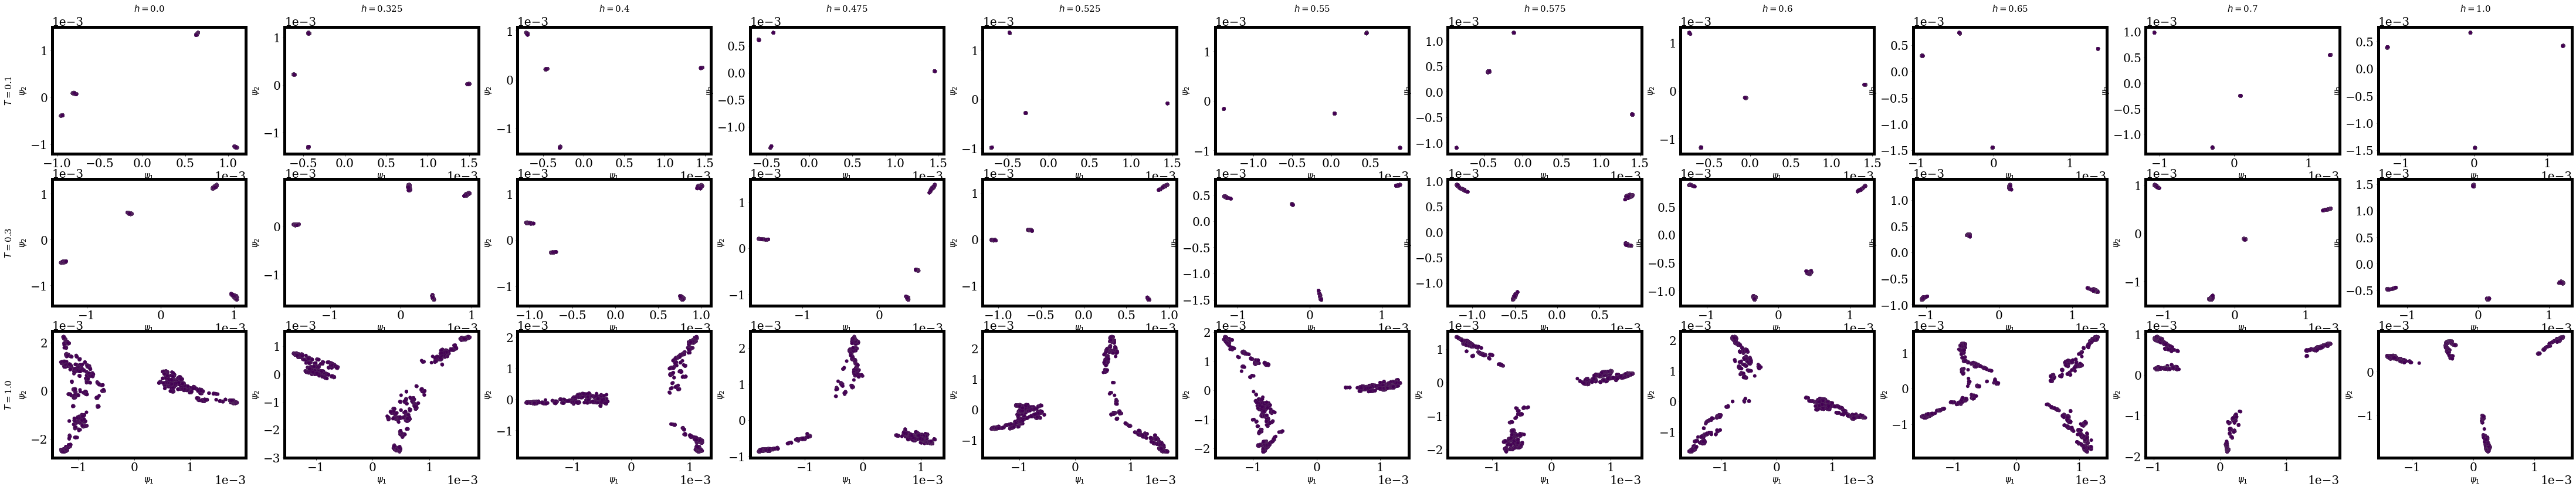

In [25]:
epsilon=0.05
fig, axes = plt.subplots(num_T, len(h_field_list), figsize=(7 * len(h_field_list), 4.5 * num_T,), squeeze=False)
plot_dm_eigenvecs(axes, eigenvecs_dict, epsilon, None, None, edgecolors='grey', linewidths=0.1, )
# fig.suptitle(f"Eigenvectors for $\epsilon=${epsilon}, $n_k$={n_cluster}, $n_\psi$={n_component_eigvec}", fontsize=20)

## Fig2

In [26]:
matplotlib.rcParams['axes.linewidth'] = 5 #set the value globally
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.rcParams.update({'font.size': 25})

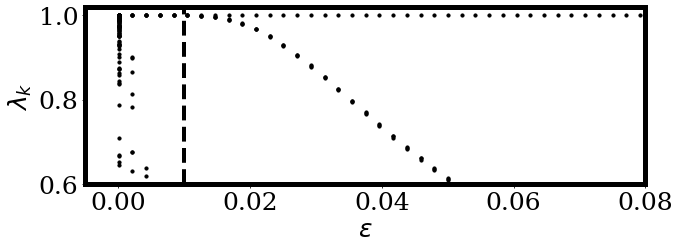

In [27]:
T, h = (0.1, 0.)
vlines=[0.015, 0.01]
ylim=[0.6, 1.02]
xlim=[-0.005, 0.08]
eigvals = eigenvals_dict[(T, h)]
eigvals = np.flip(eigvals, axis=1)
fig, ax = plt.subplots(figsize=(10, 4))
for j in range(2000):
  ax.scatter(epsilon_array, eigvals[:, j], s=10, c='k')
ax.set_ylim(ylim)
ax.set_xlim(xlim)
# ax.vlines(x=vlines[0], ymin=ylim[0], ymax=ylim[1], ls='-', lw=2, color='steelblue')
ax.vlines(x=vlines[1], ymin=ylim[0], ymax=ylim[1], ls='--', lw=4, color='black')
ax.set_xlabel(r"$\epsilon$", fontsize=25)
ax.set_ylabel(r"$\lambda_k$", fontsize=25)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig2_s_DM_eigval_h{h}_T{T}.pdf', transparent=True)
# plt.savefig(file_path_plots + "Figs/" + 'DM_eigval_h0_T0p1.png')
# files.download()

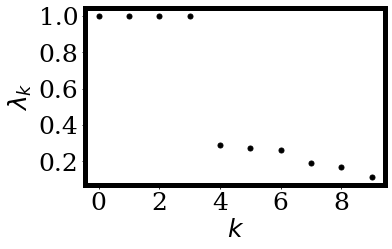

In [28]:
T, h = (0.1, 0.)
small_epsilon_list = [0.01]
num_k=10
eigvals = eigenvals_dict[(T, h)]
eigvals = np.flip(eigvals, axis=1)
fig, ax = plt.subplots(figsize=(6,4))
for epsilon in small_epsilon_list:
  epsilon_val, idx = utils.find_nearest(epsilon_array, epsilon)
  ax.scatter(np.arange(num_k), eigvals[idx, :num_k], s=25, facecolors='none', label=f"$\epsilon=${utils.round_to_2(epsilon_array[idx])}", c="k")
  ax.set_xlabel(r"$k$", fontsize=25)
  ax.set_ylabel(r"$\lambda_k$", fontsize=25)
  ax.locator_params(axis="both", nbins = 5)
  # ax.legend()
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig2_s_DM_eigval_k_h{h}_T{T}.pdf', transparent=False)
# plt.savefig(file_path_plots + "Figs/" + 'DM_eigval_k_h0_T0p1.png')
# files.download(file_path_plots + "Figs/")

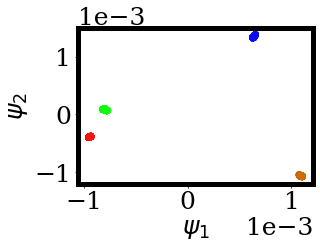

In [29]:
T, h = (0.1, 0.)
epsilon = 0.05
k_shift = 1
# plot_utils.plot_dm_eigenvecs(axes, eigenvecs_dict, epsilon, k_centers_dict, wloop_avg_color_dict, edgecolors='grey', linewidths=0.1 )
eigvecs = eigenvecs_dict[(T, h, epsilon)]
eigvecs = np.flip(eigvecs, axis=1)
w_color = wloop_avg_color_dict[(T, h)]
fig, ax = plt.subplots(figsize=(5, 4))
centers = k_centers_dict[(T, h, epsilon)]
centers = np.flip(centers, axis=1)
ax.scatter(eigvecs[:, 0+k_shift], eigvecs[:, 1+k_shift], c=w_color, ) #edgecolors='grey', linewidths=0.1)
# ax.scatter(centers[:, 0], centers[:, 1], marker="X", c='k', s=60)
ax.locator_params(axis="both", nbins = 3)
ax.ticklabel_format(axis='both', style='sci', scilimits=(-2, 2))
ax.set_xlabel("$\psi_1$", fontsize=25)
ax.set_ylabel("$\psi_2$", fontsize=25)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig2_s_DM_eigvec_h{h}_T{T}.pdf', transparent=True)
# plt.savefig(file_path_plots + "Figs/" + 'fig1_' + 'DM_eigvec_h0_T0p1.png')

## Figure 3

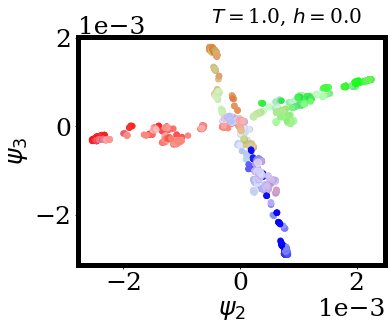

In [30]:
T, h = (1., 0.)
epsilon = 0.05
k_shift = 1
# plot_utils.plot_dm_eigenvecs(axes, eigenvecs_dict, epsilon, k_centers_dict, wloop_avg_color_dict, edgecolors='grey', linewidths=0.1 )
eigvecs = eigenvecs_dict[(T, h, epsilon)]
eigvecs = np.flip(eigvecs, axis=1)
zl = zl_dict[(T, h, epsilon)]
w_color = wloop_avg_color_dict[(T, h)]
fig, ax = plt.subplots(figsize=(6, 5))
centers = k_centers_dict[(T, h, epsilon)]
centers = np.flip(centers, axis=1)
ax.scatter(eigvecs[:, 1+k_shift], eigvecs[:, 2+k_shift], c=w_color, s=30) #edgecolors='grey', linewidths=0.1
# ax.scatter(centers[:, 0], centers[:, 1], marker="X", c='k', s=60)
ax.locator_params(axis="both", nbins = 3)
ax.ticklabel_format(axis='both', style='sci', scilimits=(-2, 2))
ax.set_xlabel("$\psi_2$", fontsize=25)
ax.set_ylabel("$\psi_3$", fontsize=25)
fig.suptitle(f"$T=${T}, $h=${h}", fontsize=20, x= 0.71, y = 0.95)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig3_s_DM_eigvec_wcolor_h{h}_T{T}.pdf', transparent=True)
# plt.savefig(file_path_plots + "Figs/" + 'fig1_' + 'DM_eigvec_h0_T0p1.png')

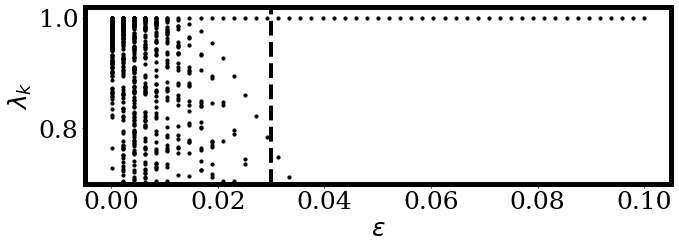

In [31]:
T, h = (1., 0.)
vlines=[0.015, 0.03]
ylim=[0.7, 1.02]
eigvals = eigenvals_dict[(T, h)]
eigvals = np.flip(eigvals, axis=1)
fig, ax = plt.subplots(figsize=(10, 4))
for j in range(2000):
  ax.scatter(epsilon_array, eigvals[:, j], s=10, c='k')
ax.set_ylim(ylim)
# ax.vlines(x=vlines[0], ymin=ylim[0], ymax=ylim[1], ls='-', lw=2, color='steelblue')
ax.vlines(x=vlines[1], ymin=ylim[0], ymax=ylim[1], ls='--', lw=4, color='black')
ax.set_xlabel(r"$\epsilon$", fontsize=25)
ax.set_ylabel(r"$\lambda_k$", fontsize=25)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig3_s_DM_eigval_h{h}_T{T}.pdf')
# plt.savefig(file_path_plots + "Figs/" + 'DM_eigval_h0_T0p1.png')
# files.download()

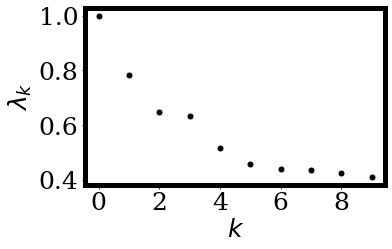

In [32]:
T, h = (1., 0.)
small_epsilon_list = [0.03]
num_k=10
eigvals = eigenvals_dict[(T, h)]
eigvals = np.flip(eigvals, axis=1)
fig, ax = plt.subplots(figsize=(6,4))
for epsilon in small_epsilon_list:
  epsilon_val, idx = utils.find_nearest(epsilon_array, epsilon)
  ax.scatter(np.arange(num_k), eigvals[idx, :num_k], s=25, facecolors='none', label=f"$\epsilon=${utils.round_to_2(epsilon_array[idx])}", c="k")
  ax.set_xlabel(r"$k$", fontsize=25)
  ax.set_ylabel(r"$\lambda_k$", fontsize=25)
  ax.locator_params(axis="both", nbins = 5)
  # ax.legend()
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig3_s_DM_eigval_k_h{h}_T{T}.pdf',transparent=True)
# plt.savefig(file_path_plots + "Figs/" + 'DM_eigval_k_h0_T0p1.png')
# files.download(file_path_plots + "Figs/")

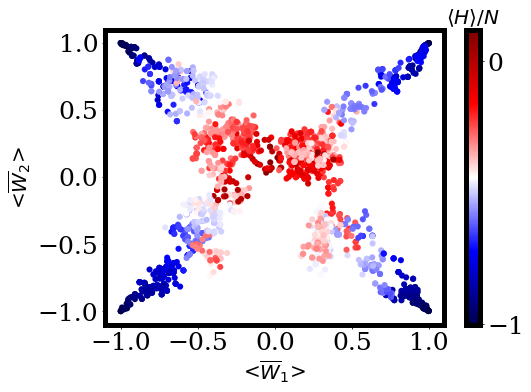

In [33]:
T, h = (1., 0.)
ens_est_ds = xr.open_dataset(data_dir + "estimates/ens_est_ds.nc")
energy = ens_est_ds['ev_ham'].sel(h=h, T=T).values /num_spins
epsilon=0.05
k_labels = k_labels_dict[(T, h, epsilon)]
w_loop = wloop_avg_dict[(T, h)]
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(w_loop[:, 0], w_loop[:, 1],  linewidths=0.1, c=energy, cmap='seismic')
# ax.scatter(centers[:, 0], centers[:, 1], marker="+", c='r', s=10)
ax.locator_params(axis="both", nbins = 5)
ax.set_xlabel("<$\overline{W}_1$>", fontsize=20)
ax.set_ylabel("<$\overline{W}_2$>", fontsize=20)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + 'DM_w_h0_T0p1.png')
clb = fig.colorbar(sc, ticks=[-1, 0])
clb.ax.set_title(r"$\langle H \rangle/N$", fontsize=20)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig3_w_h{h}_T{T}.pdf', transparent=True)

# Using overlap metric $S_q$


*   More field values
*   Optimization job id: 10331255
* Ensemble id: 11480580



In [34]:
num_T = 3
# h_field_list = [0., 0.475, 0.525, 0.55, 0.575, 0.6, 0.65, 0.7, 1.]
h_field_list = [0., 0.325, 0.4, 0.475, 0.525, 0.55, 0.575, 0.6, 0.65, 0.7, 1.]
T_list = [0.1, 0.3, 1.]

## Eigenvalues

In [35]:
file_path_plots = '/content/data_public/ensemble/11480580/' + 'DMdata/'
date_str = ''
measure_mode = "overlap"

In [36]:
file_name = date_str + f"{measure_mode}_eigvals.p"
[epsilon_array, eigenvals_dict] = pickle.load( open(file_path_plots+file_name, "rb" ) )

In [37]:
def plt_epsilon_eigenvalue(axes, eigenvals_dict, epsilon_array, num_k=None, ylim=None, vlines=None):
  rows_labels, cols_labels = zip(*eigenvals_dict.keys())
  rows_labels = sorted(set(rows_labels))
  cols_labels = sorted(set(cols_labels))
  for i, T in enumerate(rows_labels):
    for k, h_field in enumerate(cols_labels):
      eigenvals = eigenvals_dict[T, h_field]
      eigenvals = np.flip(eigenvals, axis=1)
      ax = axes[i,k]
      ax.locator_params(axis="both", nbins = 5)
      if num_k is None:
        num_k = eigenvals.shape[1]
      for j in range(num_k):
        ax.scatter(epsilon_array, eigenvals[:, j], s=10, c='k')
        ax.set_xlabel(r"$\epsilon$", fontsize=15)
        ax.set_ylabel(r"$\lambda_k$", fontsize=15)
      if ylim is not None:
        ax.set_ylim(ylim)
      if vlines is not None:
        ax.vlines(x=vlines[0], ymin=ylim[0], ymax=ylim[1], ls='-', lw=2, color='steelblue')
        ax.vlines(x=vlines[1], ymin=ylim[0], ymax=ylim[1], ls='-', lw=2, color='orange')
  pad = 5 # in points
  for ax, row in zip(axes[:,0], rows_labels):
      ax.annotate(f'$T=${row}', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                  xycoords=ax.yaxis.label, textcoords='offset points',
                  size='large', ha='right', va='center', fontsize=15, rotation=90)
  for ax, col in zip(axes[0], cols_labels):
      ax.annotate(f'$h=${col}', xy=(0.5, 1.1), xytext=(0, pad),
                  xycoords='axes fraction', textcoords='offset points',
                  size='large', ha='center', va='baseline', fontsize=15)

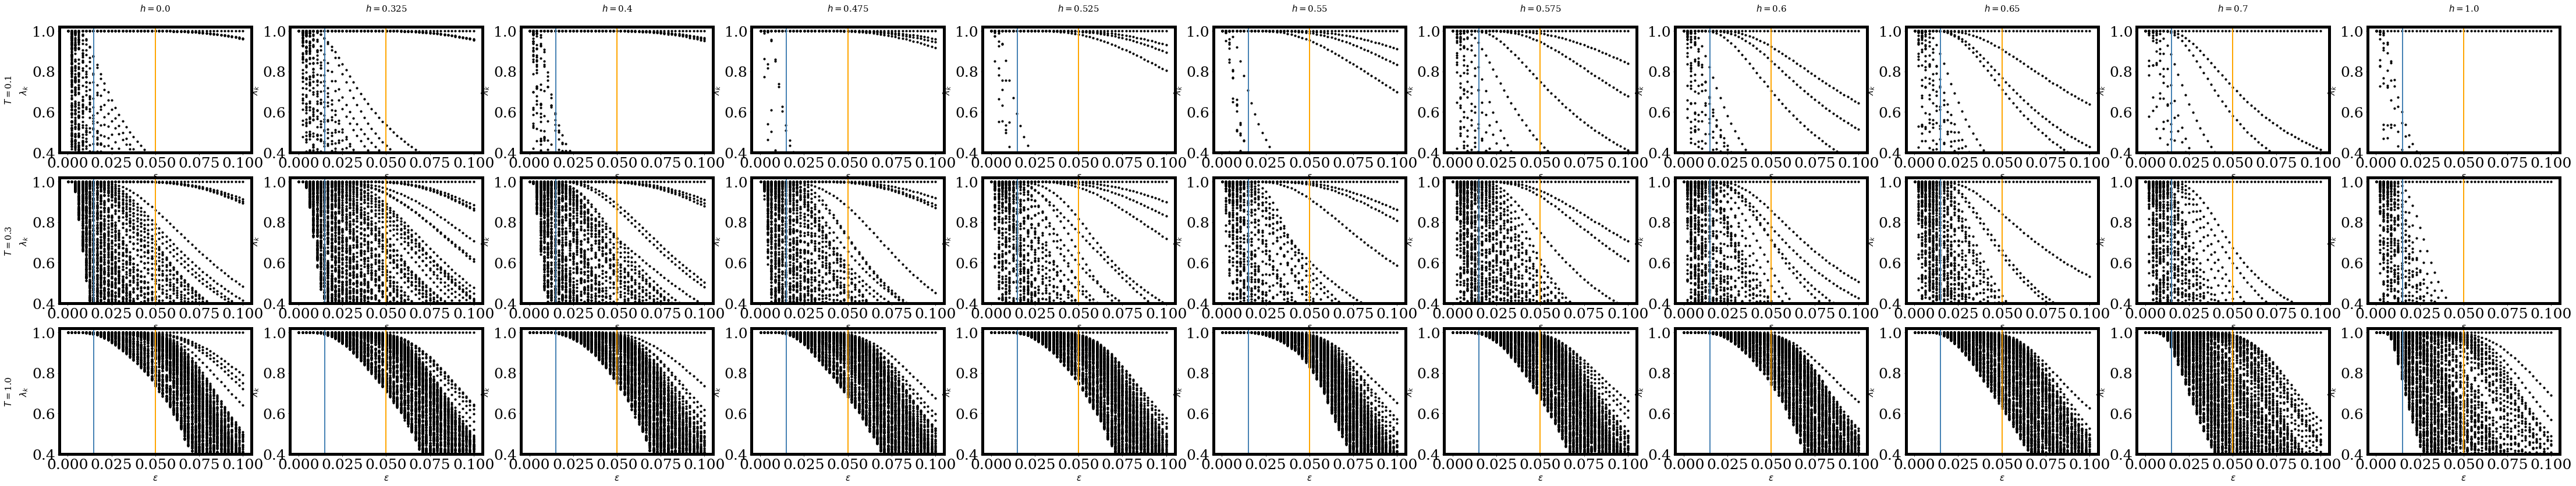

In [38]:
# epsilon_array = np.linspace(1e-4, .04, 50)
fig, axes = plt.subplots(num_T, len(h_field_list), figsize=(7 * len(h_field_list), 4.5 * num_T), squeeze=False)
plt_epsilon_eigenvalue(axes, eigenvals_dict, epsilon_array, num_k=200, ylim=[0.4, 1.02], vlines=[0.015, 0.05])

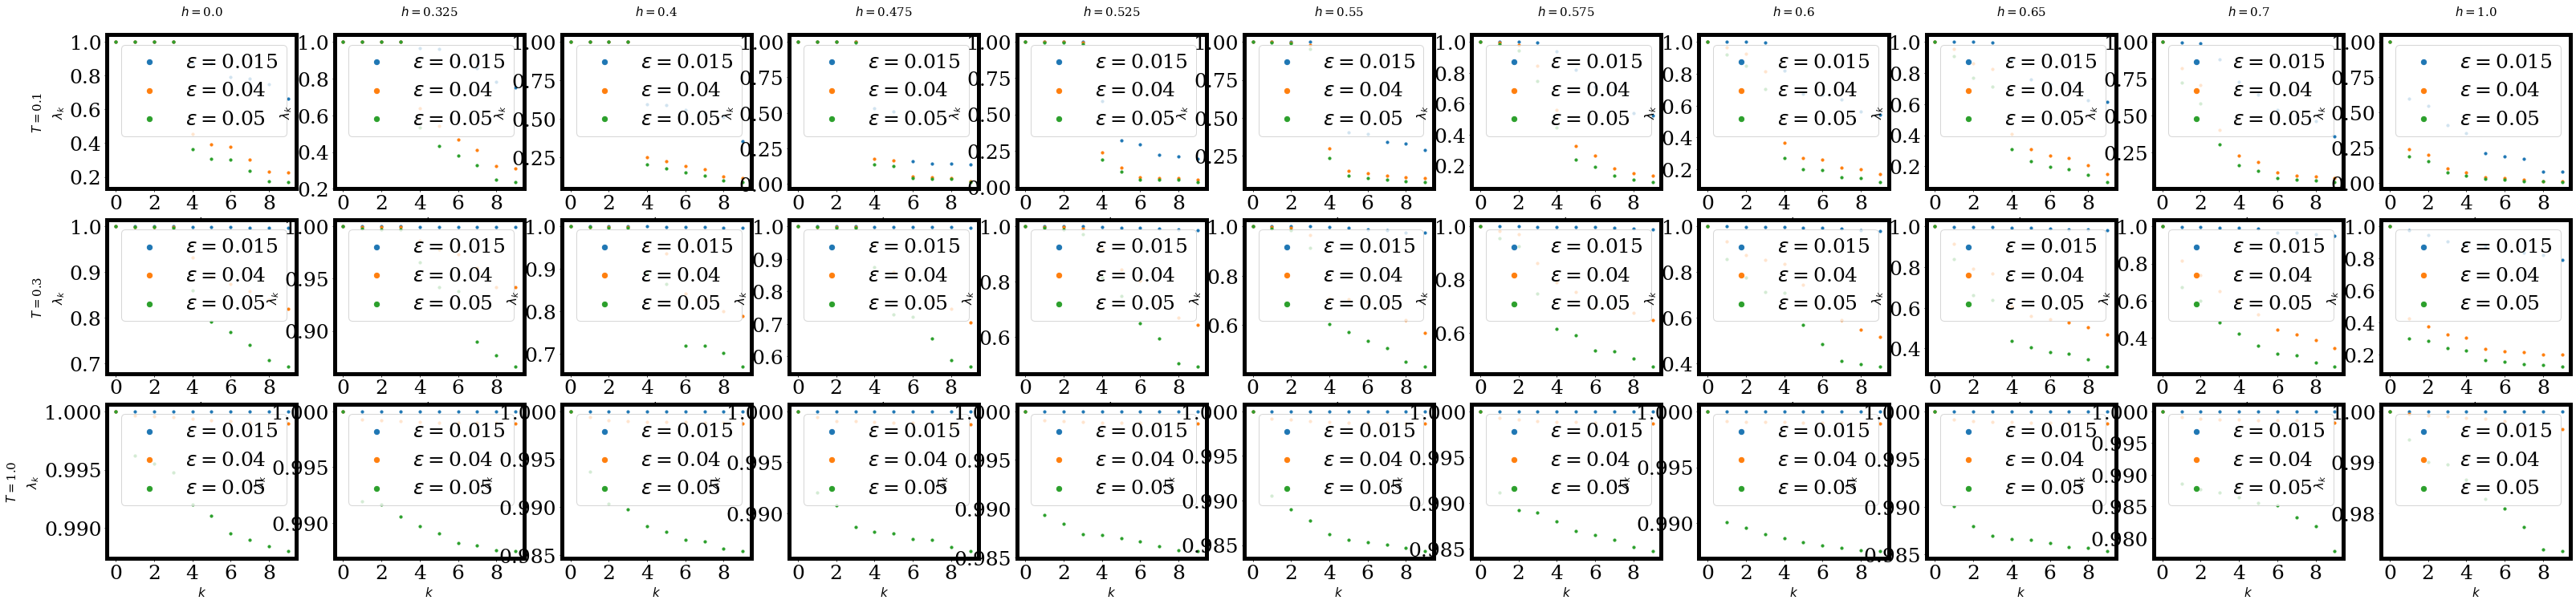

In [39]:
small_epsilon_list = [0.015, 0.04, 0.05]
fig, axes = plt.subplots( num_T, len(h_field_list), figsize=(5 * len(h_field_list) , 4 * num_T,), squeeze=False)
plot_k_eigenvalue(axes, eigenvals_dict, epsilon_array, small_epsilon_list, num_k=10)

## Eigenvectors

In [40]:
file_name = date_str + f"{measure_mode}_eigvecs.p"
eigenvecs_dict = pickle.load( open(file_path_plots+file_name, "rb" ) )
# file_name = date_str + f"smat_h{h_field_list[0]}.p"
# S_dict = pickle.load( open(file_path_plots+file_name, "rb" ) )
# file_name = date_str + f"{measure_mode}_kmat.p"
# K_dict = pickle.load( open(file_path_plots+file_name, "rb" ) )
file_name = date_str + f"{measure_mode}_zl.p"
zl_dict = pickle.load( open(file_path_plots+file_name, "rb" ) )
wloop_avg_dict, all_w_color_dict = pickle.load(open(file_path_plots + "w_color_dict.p", "rb"))

In [41]:
def kmeans_cluster(projections_dict, n_clusters_dict):
  k_labels_dict = {}
  k_centers_dict = {}
  k_dist_dict = {}
  for key, projections in projections_dict.items():
    n_clusters = n_clusters_dict[key]
    kmeans = KMeans(n_clusters).fit(projections)
    k_labels = kmeans.predict(projections)
    k_labels_dict[key] = k_labels
    k_centers_dict[key] = kmeans.cluster_centers_
    k_dist_dict[key] = kmeans.inertia_
  return k_labels_dict, k_centers_dict, k_dist_dict

In [42]:
n_component_eigvec = 3
k_projections_dict = utils.slice_along_axis(eigenvecs_dict, axis=1, idx=slice(-n_component_eigvec-1, -1))
n_cluster_dict = {k: 4 if k[0]< 0.7 else 1 for k in k_projections_dict.keys()}
k_labels_dict, k_centers_dict, k_dist_dict = kmeans_cluster(k_projections_dict, n_cluster_dict)
wloop_avg_color_dict = {k: get_color(v) for k, v in wloop_avg_dict.items()}

/content/ml_toric_code/utils.py:115: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  arrays, tree_def = jax.tree_flatten(inputs)
/content/ml_toric_code/utils.py:126: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(tree_def, sliced)


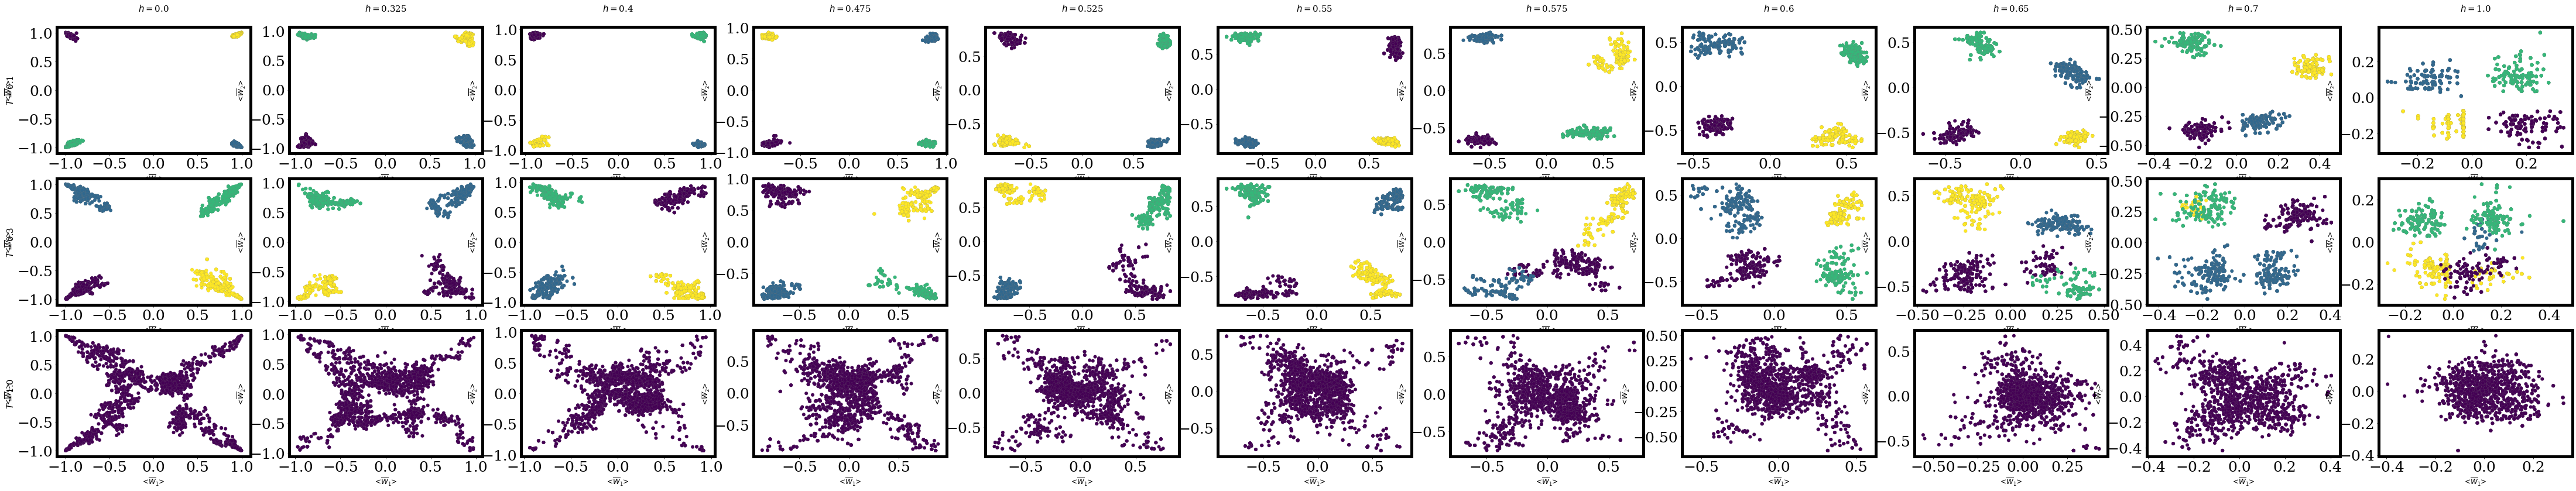

In [43]:
epsilon=0.05
fig, axes = plt.subplots(num_T, len(h_field_list), figsize=(7 *len(h_field_list), 4.5 * num_T), squeeze=False)
plot_kmeans_wloop(axes, wloop_avg_dict, k_labels_dict, epsilon=epsilon)
# plt.suptitle(f"K-means (DM {kernel_name}), $\epsilon={epsilon}$, $n_k$={n_cluster}, $n_\psi$={n_component_eigvec}", fontsize=20, x=0.5, y=1., fontweight=2.5)

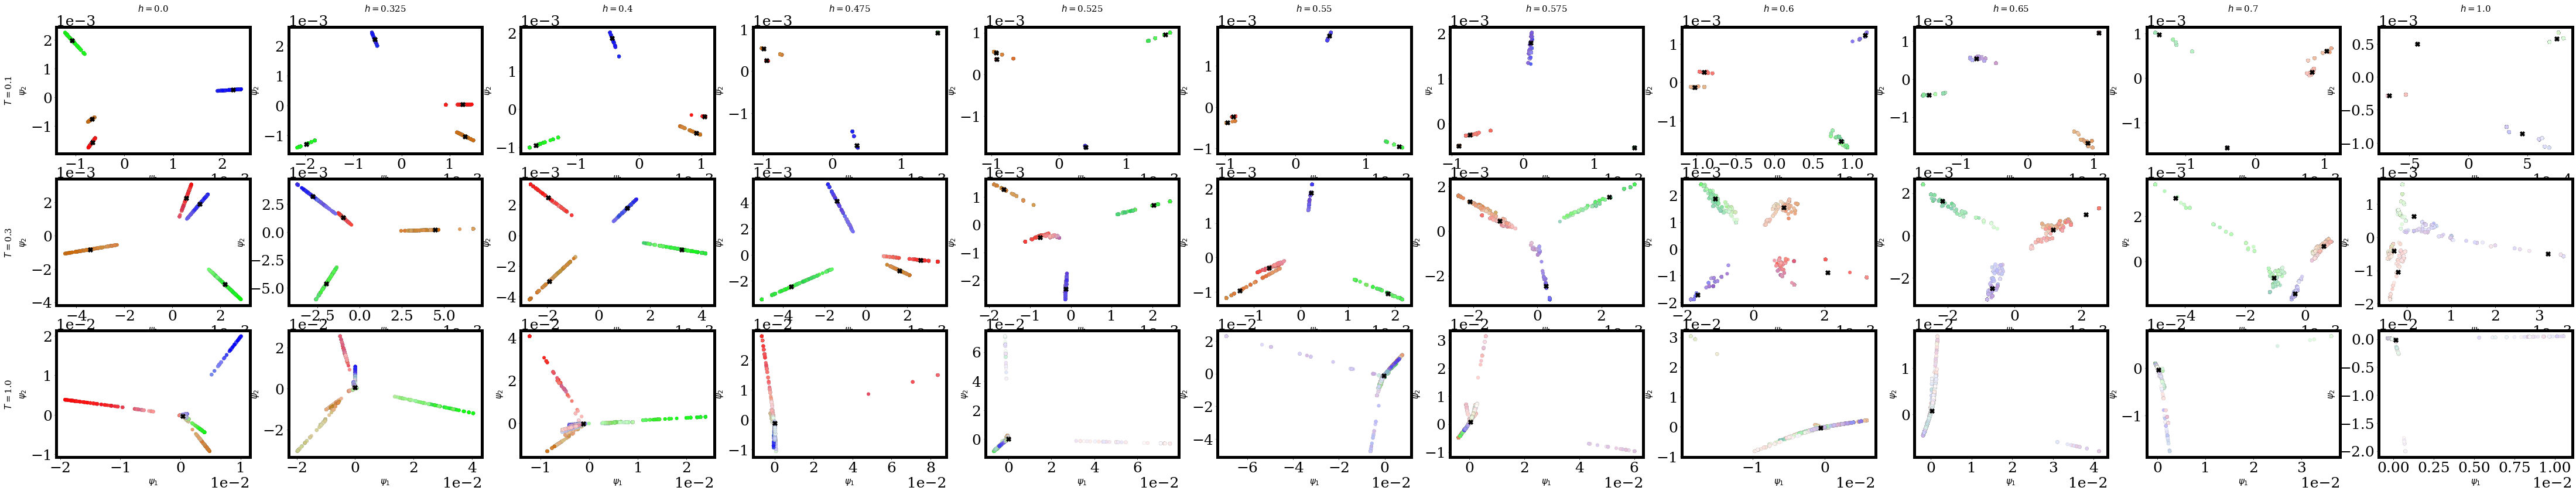

In [44]:
epsilon=0.05
fig, axes = plt.subplots(num_T, len(h_field_list), figsize=(7 * len(h_field_list), 4.5 * num_T,), squeeze=False)
plot_dm_eigenvecs(axes, eigenvecs_dict, epsilon, k_centers_dict, wloop_avg_color_dict, edgecolors='grey', linewidths=0.1 )
# fig.suptitle(f"Eigenvectors for $\epsilon=${epsilon}, $n_k$={n_cluster}, $n_\psi$={n_component_eigvec}", fontsize=20)

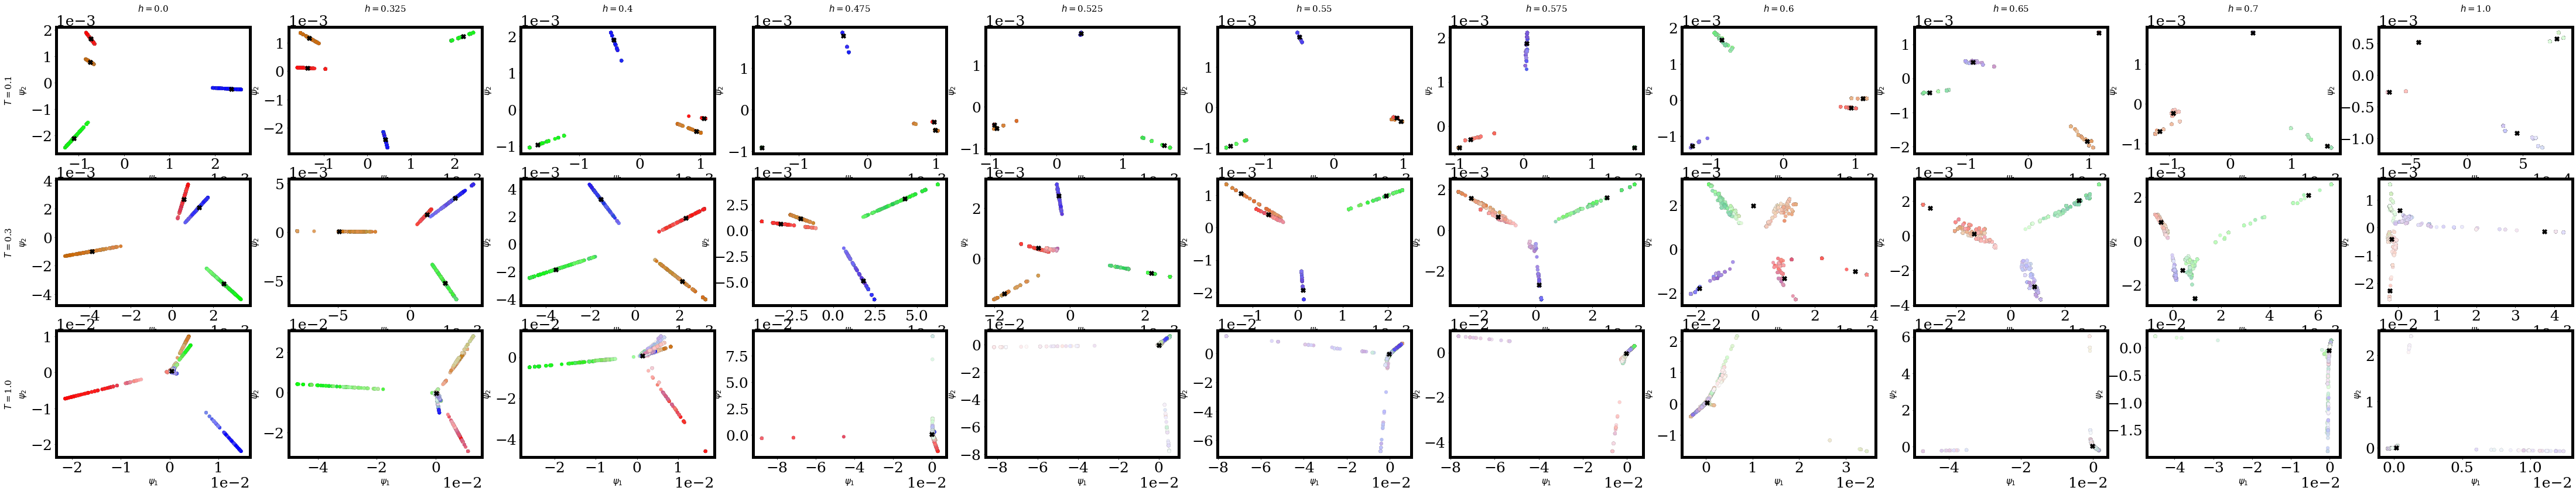

In [45]:
epsilon=0.04
fig, axes = plt.subplots(num_T, len(h_field_list), figsize=(7 * len(h_field_list), 4.5 * num_T,), squeeze=False)
plot_dm_eigenvecs(axes, eigenvecs_dict, epsilon, k_centers_dict, wloop_avg_color_dict, edgecolors='grey', linewidths=0.1 )
# fig.suptitle(f"Eigenvectors for $\epsilon=${epsilon}, $n_k$={n_cluster}, $n_\psi$={n_component_eigvec}", fontsize=20)

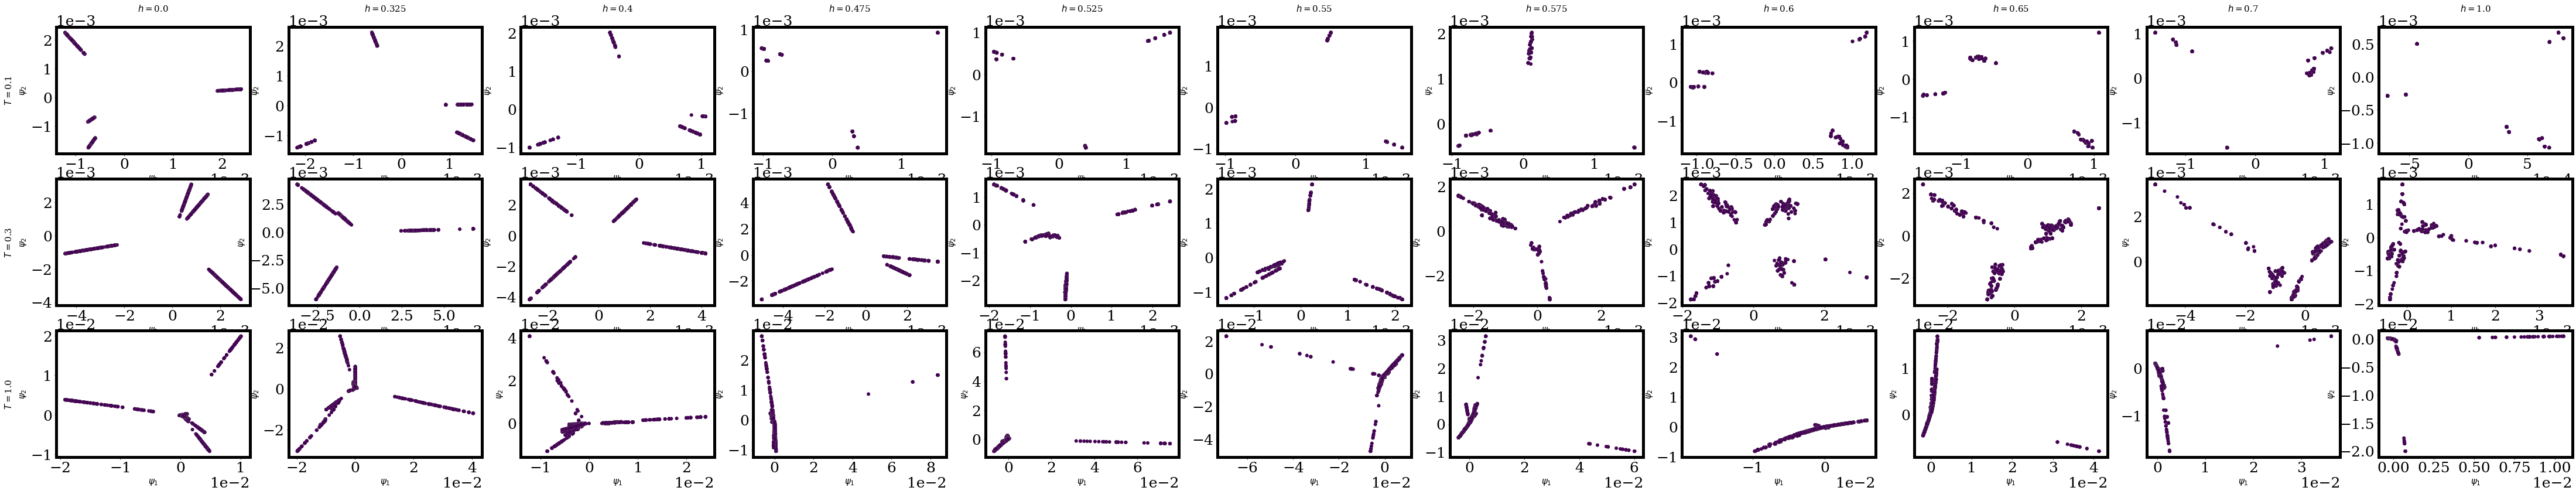

In [46]:
epsilon=0.05
fig, axes = plt.subplots(num_T, len(h_field_list), figsize=(7 * len(h_field_list), 4.5 * num_T,), squeeze=False)
plot_dm_eigenvecs(axes, eigenvecs_dict, epsilon, None, None, edgecolors='grey', linewidths=0.1, )
# fig.suptitle(f"Eigenvectors for $\epsilon=${epsilon}, $n_k$={n_cluster}, $n_\psi$={n_component_eigvec}", fontsize=20)

## Fig2

In [47]:
matplotlib.rcParams['axes.linewidth'] = 5 #set the value globally
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.rcParams.update({'font.size': 25})

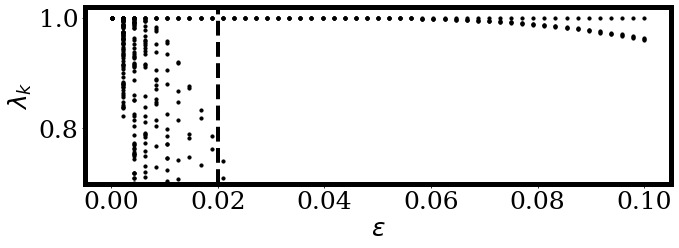

In [48]:
T, h = (0.1, 0.)
vlines=[0.015, 0.02]
ylim=[0.7, 1.02]
eigvals = eigenvals_dict[(T, h)]
eigvals = np.flip(eigvals, axis=1)
fig, ax = plt.subplots(figsize=(10, 4))
for j in range(100):
  ax.scatter(epsilon_array, eigvals[:, j], s=10, c='k')
ax.set_ylim(ylim)
# ax.vlines(x=vlines[0], ymin=ylim[0], ymax=ylim[1], ls='-', lw=2, color='steelblue')
ax.vlines(x=vlines[1], ymin=ylim[0], ymax=ylim[1], ls='--', lw=4, color='black')
ax.set_xlabel(r"$\epsilon$", fontsize=25)
ax.set_ylabel(r"$\lambda_k$", fontsize=25)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig2_o_DM_eigval_h{h}_T{T}.pdf')
# plt.savefig(file_path_plots + "Figs/" + 'DM_eigval_h0_T0p1.png')
# files.download()

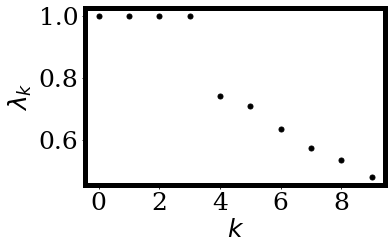

In [49]:
T, h = (0.1, 0.)
small_epsilon_list = [0.02]
num_k=10
eigvals = eigenvals_dict[(T, h)]
eigvals = np.flip(eigvals, axis=1)
fig, ax = plt.subplots(figsize=(6,4))
for epsilon in small_epsilon_list:
  epsilon_val, idx = utils.find_nearest(epsilon_array, epsilon)
  ax.scatter(np.arange(num_k), eigvals[idx, :num_k], s=25, facecolors='none', label=f"$\epsilon=${utils.round_to_2(epsilon_array[idx])}", c="k")
  ax.set_xlabel(r"$k$", fontsize=25)
  ax.set_ylabel(r"$\lambda_k$", fontsize=25)
  ax.locator_params(axis="both", nbins = 5)
  # ax.legend()
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig2_o_DM_eigval_k_h{h}_T{T}.pdf', transparent=False)
# plt.savefig(file_path_plots + "Figs/" + 'DM_eigval_k_h0_T0p1.png')
# files.download(file_path_plots + "Figs/")

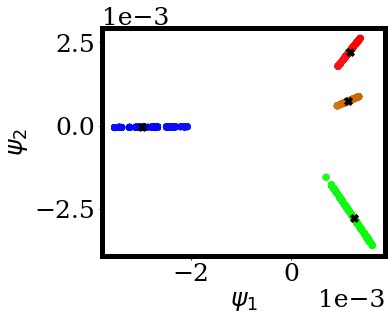

In [50]:
T, h = (0.1, 0.)
epsilon = 0.02
k_shift = 1
# plot_utils.plot_dm_eigenvecs(axes, eigenvecs_dict, epsilon, k_centers_dict, wloop_avg_color_dict, edgecolors='grey', linewidths=0.1 )
eigvecs = eigenvecs_dict[(T, h, epsilon)]
eigvecs = np.flip(eigvecs, axis=1)
w_color = wloop_avg_color_dict[(T, h)]
fig, ax = plt.subplots(figsize=(6, 5))
centers = k_centers_dict[(T, h, epsilon)]
centers = np.flip(centers, axis=1)
ax.scatter(eigvecs[:, 0+k_shift], eigvecs[:, 1+k_shift], c=w_color, ) #edgecolors='grey', linewidths=0.0
ax.scatter(centers[:, 0], centers[:, 1], marker="X", c='k', s=60)
ax.locator_params(axis="both", nbins = 3)
ax.ticklabel_format(axis='both', style='sci', scilimits=(-2, 2))
ax.set_xlabel("$\psi_1$", fontsize=25)
ax.set_ylabel("$\psi_2$", fontsize=25)
# fig.suptitle(f"$T=${T}, $h=${h}", fontsize=20, x= 0.71, y = 0.95)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig2_o_DM_eigvec_h{h}_T{T}.pdf', transparent=True)
# plt.savefig(file_path_plots + "Figs/" + 'fig1_' + 'DM_eigvec_h0_T0p1.png')

## Fig3

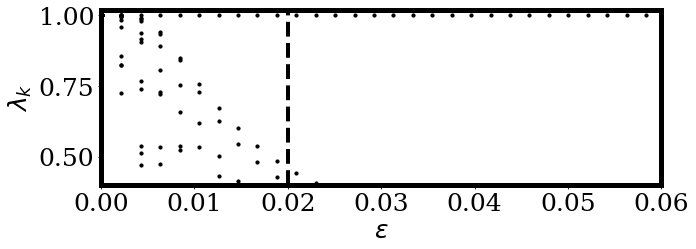

In [51]:
T, h = (0.1, 1.)
vlines=[0.015, 0.02]
ylim=[0.4, 1.02]
xlim=[0., 0.06]
eigvals = eigenvals_dict[(T, h)]
eigvals = np.flip(eigvals, axis=1)
fig, ax = plt.subplots(figsize=(10, 4))
for j in range(100):
  ax.scatter(epsilon_array, eigvals[:, j], s=10, c='k')
ax.set_ylim(ylim)
ax.set_xlim(xlim)
# ax.vlines(x=vlines[0], ymin=ylim[0], ymax=ylim[1], ls='-', lw=2, color='steelblue')
ax.vlines(x=vlines[1], ymin=ylim[0], ymax=ylim[1], ls='--', lw=4, color='black')
ax.set_xlabel(r"$\epsilon$", fontsize=25)
ax.set_ylabel(r"$\lambda_k$", fontsize=25)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig3_o_DM_eigval_h{h}_T{T}.pdf', transparent=True)
# plt.savefig(file_path_plots + "Figs/" + 'DM_eigval_h0_T0p1.png')
# files.download()

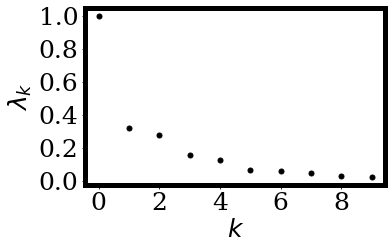

In [52]:
T, h = (0.1, 1.)
small_epsilon_list = [0.03]
num_k=10
eigvals = eigenvals_dict[(T, h)]
eigvals = np.flip(eigvals, axis=1)
fig, ax = plt.subplots(figsize=(6,4))
for epsilon in small_epsilon_list:
  epsilon_val, idx = utils.find_nearest(epsilon_array, epsilon)
  ax.scatter(np.arange(num_k), eigvals[idx, :num_k], s=25, facecolors='none', label=f"$\epsilon=${utils.round_to_2(epsilon_array[idx])}", c="k")
  ax.set_xlabel(r"$k$", fontsize=25)
  ax.set_ylabel(r"$\lambda_k$", fontsize=25)
  ax.locator_params(axis="both", nbins = 5)
  ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
  # ax.legend()
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig3_o_DM_eigval_k_h{h}_T{T}.pdf', transparent=True)
# plt.savefig(file_path_plots + "Figs/" + 'DM_eigval_k_h0_T0p1.png')
# files.download(file_path_plots + "Figs/")

## Fig4

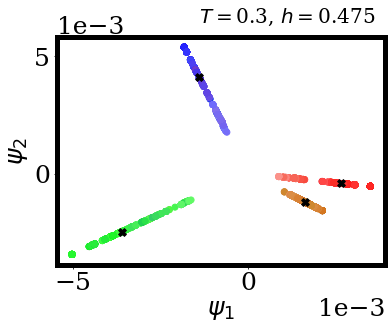

In [53]:
T, h = (0.3, 0.475)
epsilon = 0.05
k_shift = 1
# plot_utils.plot_dm_eigenvecs(axes, eigenvecs_dict, epsilon, k_centers_dict, wloop_avg_color_dict, edgecolors='grey', linewidths=0.1 )
eigvecs = eigenvecs_dict[(T, h, epsilon)]
eigvecs = np.flip(eigvecs, axis=1)
w_color = wloop_avg_color_dict[(T, h)]
fig, ax = plt.subplots(figsize=(6, 5))
centers = k_centers_dict[(T, h, epsilon)]
centers = np.flip(centers, axis=1)
ax.scatter(eigvecs[:, 0+k_shift], eigvecs[:, 1+k_shift], c=w_color, ) #edgecolors='grey', linewidths=0.1
ax.scatter(centers[:, 0], centers[:, 1], marker="X", c='k', s=60)
ax.locator_params(axis="both", nbins = 3)
ax.ticklabel_format(axis='both', style='sci', scilimits=(-2, 2))
ax.set_xlabel("$\psi_1$", fontsize=25)
ax.set_ylabel("$\psi_2$", fontsize=25)
fig.suptitle(f"$T=${T}, $h=${h}", fontsize=20, x= 0.71, y = 0.95)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig4_o_DM_eigvec_h{h}_T{T}.pdf')
# plt.savefig(file_path_plots + "Figs/" + 'fig1_' + 'DM_eigvec_h0_T0p1.png')

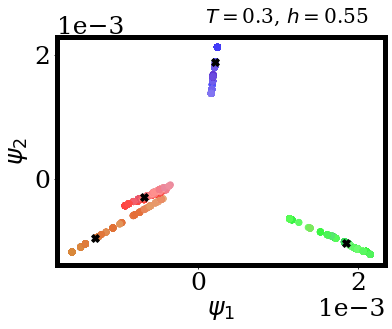

In [54]:
T, h = (0.3, 0.55)
epsilon = 0.05
k_shift = 1
# plot_utils.plot_dm_eigenvecs(axes, eigenvecs_dict, epsilon, k_centers_dict, wloop_avg_color_dict, edgecolors='grey', linewidths=0.1 )
eigvecs = eigenvecs_dict[(T, h, epsilon)]
eigvecs = np.flip(eigvecs, axis=1)
w_color = wloop_avg_color_dict[(T, h)]
fig, ax = plt.subplots(figsize=(6, 5))
centers = k_centers_dict[(T, h, epsilon)]
centers = np.flip(centers, axis=1)
ax.scatter(eigvecs[:, 0+k_shift], eigvecs[:, 1+k_shift], c=w_color,) #edgecolors='grey', linewidths=0.1
ax.scatter(centers[:, 0], centers[:, 1], marker="X", c='k', s=60)
ax.locator_params(axis="both", nbins = 3)
ax.ticklabel_format(axis='both', style='sci', scilimits=(-2, 2))
ax.set_xlabel("$\psi_1$", fontsize=25)
ax.set_ylabel("$\psi_2$", fontsize=25)
fig.suptitle(f"$T=${T}, $h=${h}", fontsize=20, x= 0.71, y = 0.95)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig4_o_DM_eigvec_h{h}_T{T}.pdf')
# plt.savefig(file_path_plots + "Figs/" + 'fig1_' + 'DM_eigvec_h0_T0p1.png')

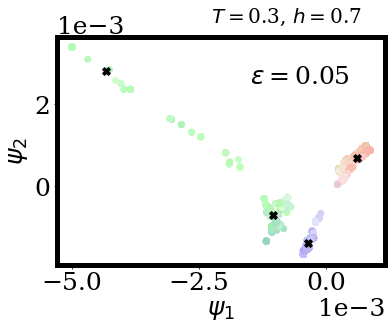

In [55]:
T, h = (0.3, 0.7)
epsilon = 0.05
k_shift = 1
# plot_utils.plot_dm_eigenvecs(axes, eigenvecs_dict, epsilon, k_centers_dict, wloop_avg_color_dict, edgecolors='grey', linewidths=0.1 )
eigvecs = eigenvecs_dict[(T, h, epsilon)]
eigvecs = np.flip(eigvecs, axis=1)
w_color = wloop_avg_color_dict[(T, h)]
fig, ax = plt.subplots(figsize=(6, 5))
centers = k_centers_dict[(T, h, epsilon)]
centers = np.flip(centers, axis=1)
ax.scatter(eigvecs[:, 0+k_shift], eigvecs[:, 1+k_shift], c=w_color, ) #edgecolors='grey', linewidths=0.05
#, label=f"$\epsilon=${epsilon}"
ax.scatter(centers[:, 0], centers[:, 1], marker="X", c='k', s=60)
ax.locator_params(axis="both", nbins = 3)
ax.ticklabel_format(axis='both', style='sci', scilimits=(-2, 2))
ax.set_xlabel("$\psi_1$", fontsize=25)
ax.set_ylabel("$\psi_2$", fontsize=25)
ax.annotate(f"$\epsilon=${epsilon}", (-0.0015, 0.0025))
fig.suptitle(f"$T=${T}, $h=${h}", fontsize=20, x= 0.71, y = 0.95)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig4_o_DM_eigvec_h{h}_T{T}.pdf')
# plt.savefig(file_path_plots + "Figs/" + 'fig1_' + 'DM_eigvec_h0_T0p1.png')

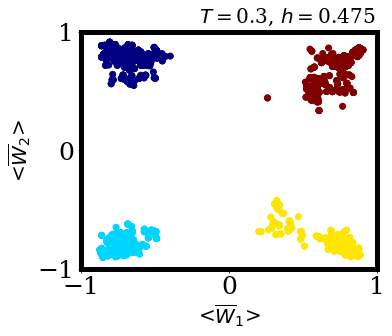

In [56]:
T, h = (0.3, 0.475)
epsilon=0.05
k_labels = k_labels_dict[(T, h, epsilon)]
w_loop = wloop_avg_dict[(T, h)]
fig, ax = plt.subplots(figsize=(6,5))
colors = plt.cm.jet(np.linspace(0,1,len(np.unique(k_labels))))
ax.scatter(w_loop[:, 0], w_loop[:, 1], c=[colors[i] for i in k_labels], ) #edgecolors='grey', linewidths=0.1
ax.set_xticks([-1, 0, 1])
ax.set_xlim([-1, 1])
ax.set_yticks([-1, 0, 1])
ax.set_ylim([-1, 1])
ax.locator_params(axis="both", nbins = 3)
ax.set_xlabel("<$\overline{W}_1$>", fontsize=20)
ax.set_ylabel("<$\overline{W}_2$>", fontsize=20)
fig.suptitle(f"$T=${T}, $h=${h}", fontsize=20, x= 0.71, y = 0.97)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig4_w_h{h}_T{T}.pdf')
# plt.savefig(file_path_plots + "Figs/" + 'Fig3_w_h0_T0p7.pdf')
# plt.savefig(file_path_plots + "Figs/" + 'DM_w_h0_T0p1.png')


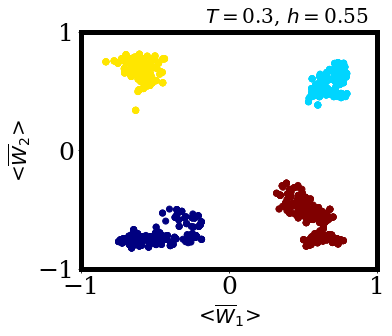

In [57]:
T, h = (0.3, 0.55)
epsilon=0.05
k_labels = k_labels_dict[(T, h, epsilon)]
w_loop = wloop_avg_dict[(T, h)]
fig, ax = plt.subplots(figsize=(6,5))
colors = plt.cm.jet(np.linspace(0,1,len(np.unique(k_labels))))
ax.scatter(w_loop[:, 0], w_loop[:, 1], c=[colors[i] for i in k_labels], ) #edgecolors='grey', linewidths=0.1
ax.set_xticks([-1, 0, 1])
ax.set_xlim([-1, 1])
ax.set_yticks([-1, 0, 1])
ax.set_ylim([-1, 1])
ax.locator_params(axis="both", nbins = 3)
ax.set_xlabel("<$\overline{W}_1$>", fontsize=20)
ax.set_ylabel("<$\overline{W}_2$>", fontsize=20)
fig.suptitle(f"$T=${T}, $h=${h}", fontsize=20, x= 0.71, y = 0.97)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig4_w_h{h}_T{T}.pdf')
# plt.savefig(file_path_plots + "Figs/" + 'Fig3_w_h0_T0p7.pdf')
# plt.savefig(file_path_plots + "Figs/" + 'DM_w_h0_T0p1.png')


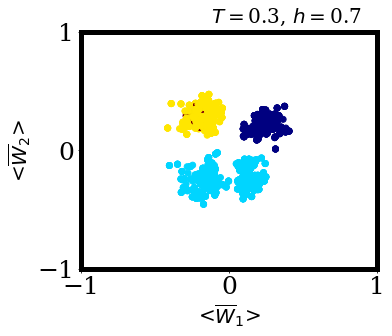

In [58]:
T, h = (0.3, 0.7)
epsilon=0.05
k_labels = k_labels_dict[(T, h, epsilon)]
w_loop = wloop_avg_dict[(T, h)]
fig, ax = plt.subplots(figsize=(6,5))
colors = plt.cm.jet(np.linspace(0,1,len(np.unique(k_labels))))
ax.scatter(w_loop[:, 0], w_loop[:, 1], c=[colors[i] for i in k_labels], ) #edgecolors='grey', linewidths=0.1
ax.set_xticks([-1, 0, 1])
ax.set_xlim([-1, 1])
ax.set_yticks([-1, 0, 1])
ax.set_ylim([-1, 1])
ax.locator_params(axis="both", nbins = 3)
ax.set_xlabel("<$\overline{W}_1$>", fontsize=20)
ax.set_ylabel("<$\overline{W}_2$>", fontsize=20)
fig.suptitle(f"$T=${T}, $h=${h}", fontsize=20, x= 0.71, y = 0.97)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig4_w_h{h}_T{T}.pdf')
# plt.savefig(file_path_plots + "Figs/" + 'Fig3_w_h0_T0p7.pdf')
# plt.savefig(file_path_plots + "Figs/" + 'DM_w_h0_T0p1.png')


In [59]:
epsilon = 0.05
T = 0.3
num_k = 10

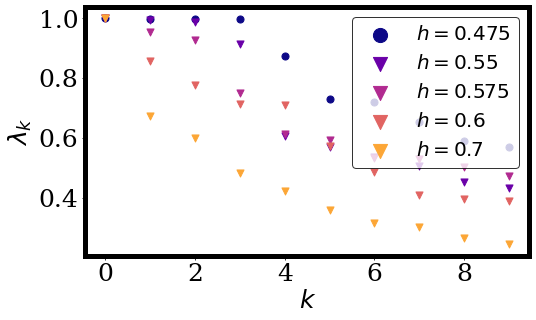

In [60]:
fig, ax = plt.subplots(figsize=(8, 5))
small_h_list = [0.475, 0.55, 0.575, 0.6, 0.7]
colors = plt.cm.plasma(np.linspace(0,1, len(small_h_list)+1))
for i, h in enumerate(small_h_list):
  eigenvals = eigenvals_dict[T, h]
  eigenvals = np.flip(eigenvals, axis=1)
  epsilon_val, idx = utils.find_nearest(epsilon_array, epsilon)
  if h < 0.55:
    ax.scatter(np.arange(num_k), eigenvals[idx, :num_k], s=50, marker='o', label=f"$h={h}$", color=colors[i])
  else:
    ax.scatter(np.arange(num_k), eigenvals[idx, :num_k], s=50, marker='v', label=f"$h={h}$", color=colors[i])
# ax.scatter(h_field_list, k_dist, marker='o', s=100)
ax.locator_params(axis="both", nbins = 5)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2, 2))
ax.set_xlabel("$k$", fontsize=25)
ax.set_ylabel("$\lambda_k$", fontsize=25)
ax.legend(frameon=True, edgecolor='black', fontsize=20)
plt.tight_layout()
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(file_path_plots + "Figs/" + f'o_transition_lambda.pdf')

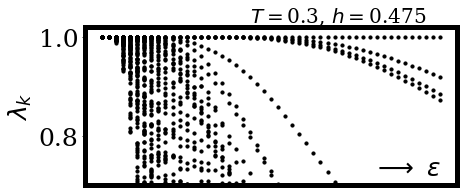

In [61]:
T, h = (0.3, 0.475)
vlines=[0.015, 0.05]
ylim=[0.7, 1.02]
eigvals = eigenvals_dict[(T, h)]
eigvals = np.flip(eigvals, axis=1)
fig, ax = plt.subplots(figsize=(7, 3))
for j in range(100):
  ax.scatter(epsilon_array, eigvals[:, j], s=10, c='k')
ax.set_ylim(ylim)
# ax.vlines(x=vlines[0], ymin=ylim[0], ymax=ylim[1], ls='-', lw=2, color='steelblue')
# ax.vlines(x=vlines[1], ymin=ylim[0], ymax=ylim[1], ls='--', lw=4, color='black')
# ax.set_xlabel(r"$\epsilon$", fontsize=25)
ax.set_xticks([])
# ax.set_yticks([])
ax.set_ylabel(r"$\lambda_k$", fontsize=25)
ax.annotate(r"$\longrightarrow$ $\epsilon$", (0.08, 0.72))
fig.suptitle(f"$T=${T}, $h=${h}", fontsize=20, x= 0.71, y = 0.97)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig4_o_DM_eigval_h{h}_T{T}.pdf')
# plt.savefig(file_path_plots + "Figs/" + 'DM_eigval_h0_T0p1.png')
# files.download()

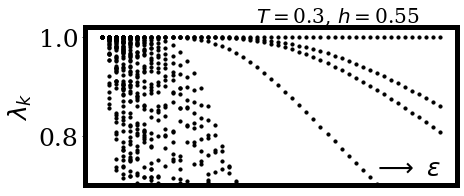

In [62]:
T, h = (0.3, 0.55)
vlines=[0.015, 0.05]
ylim=[0.7, 1.02]
eigvals = eigenvals_dict[(T, h)]
eigvals = np.flip(eigvals, axis=1)
fig, ax = plt.subplots(figsize=(7, 3))
for j in range(100):
  ax.scatter(epsilon_array, eigvals[:, j], s=10, c='k')
ax.set_ylim(ylim)
# ax.vlines(x=vlines[0], ymin=ylim[0], ymax=ylim[1], ls='-', lw=2, color='steelblue')
# ax.vlines(x=vlines[1], ymin=ylim[0], ymax=ylim[1], ls='--', lw=4, color='black')
# ax.set_xlabel(r"$\epsilon$", fontsize=25)
ax.set_xticks([])
# ax.set_yticks([])
ax.set_ylabel(r"$\lambda_k$", fontsize=25)
ax.annotate(r"$\longrightarrow$ $\epsilon$", (0.08, 0.72))
fig.suptitle(f"$T=${T}, $h=${h}", fontsize=20, x= 0.71, y = 0.97)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig4_o_DM_eigval_h{h}_T{T}.pdf')
# plt.savefig(file_path_plots + "Figs/" + 'DM_eigval_h0_T0p1.png')
# files.download()

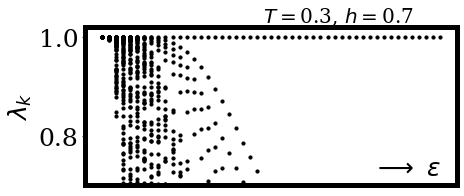

In [63]:
T, h = (0.3, 0.7)
vlines=[0.015, 0.05]
ylim=[0.7, 1.02]
eigvals = eigenvals_dict[(T, h)]
eigvals = np.flip(eigvals, axis=1)
fig, ax = plt.subplots(figsize=(7, 3))
for j in range(100):
  ax.scatter(epsilon_array, eigvals[:, j], s=10, c='k')
ax.set_ylim(ylim)
# ax.vlines(x=vlines[0], ymin=ylim[0], ymax=ylim[1], ls='-', lw=2, color='steelblue')
# ax.vlines(x=vlines[1], ymin=ylim[0], ymax=ylim[1], ls='--', lw=4, color='black')
# ax.set_xlabel(r"$\epsilon$", fontsize=25)
ax.set_xticks([])
# ax.set_yticks([])
ax.set_ylabel(r"$\lambda_k$", fontsize=25)
ax.annotate(r"$\longrightarrow$ $\epsilon$", (0.08, 0.72))
fig.suptitle(f"$T=${T}, $h=${h}", fontsize=20, x= 0.71, y = 0.97)
plt.tight_layout()
# plt.savefig(file_path_plots + "Figs/" + f'Fig4_o_DM_eigval_h{h}_T{T}.pdf')
# plt.savefig(file_path_plots + "Figs/" + 'DM_eigval_h0_T0p1.png')
# files.download()

# Appendices: optimization and ensemble


*   More field values
*   Optimization job id: 10331255
* Ensemble id: 11480580



## Ensemble

In [9]:
data_dir = '/content/data_public/ensemble/11480580/estimates/'
file_path_plots = data_dir
# file_path_plots = "/content/drive/MyDrive/Projects/ML_toric_code/Draft/Figures/Figure_TeX draft 2/FigAppendix/"

In [10]:
ens_est_ds = xr.open_dataset(data_dir + "ens_est_ds.nc")

In [11]:
ens_est_ds['ev_WLY_mean'].sel(h=0, T=0.1).values

array([[-0.99982643, -0.99982643, -0.99982643, ...,  0.96156067,
         0.96156067,  0.96156067]], dtype=float32)

In [12]:
ens_est_ds

<xarray.Dataset>
Dimensions:       (ensemble_id: 2000, h: 11, T: 3, iter: 1, L: 3, dir: 2)
Coordinates:
  * ensemble_id   (ensemble_id) int32 0 1 2 3 4 5 ... 1995 1996 1997 1998 1999
  * h             (h) float64 0.0 0.325 0.4 0.475 0.525 ... 0.6 0.65 0.7 1.0
  * T             (T) float64 0.1 0.3 1.0
  * iter          (iter) int32 2
Dimensions without coordinates: L, dir
Data variables: (12/22)
    accept        (h, T, iter, ensemble_id) float32 ...
    ev_WLX0       (h, T, iter, ensemble_id) float32 ...
    ev_WLX1       (h, T, iter, ensemble_id) float32 ...
    ev_WLX2       (h, T, iter, ensemble_id) float32 ...
    ev_WLY0       (h, T, iter, ensemble_id) float32 ...
    ev_WLY1       (h, T, iter, ensemble_id) float32 ...
    ...            ...
    std_pauliZ    (h, T, iter, ensemble_id) float32 ...
    ev_WLX        (L, h, T, iter, ensemble_id) float32 ...
    ev_WLY        (L, h, T, iter, ensemble_id) float32 ...
    ev_WLX_mean   (h, T, iter, ensemble_id) float32 ...
    ev_WLY_mean   (h, T, iter, ensemble_id) float32 ...
    ev_WLXY_mean  (h, T, iter, ensemble_id, dir) float32 ...

In [19]:
ens_est_ds.isel({'iter':0, })['ev_ham'].values.max()

2.1796033

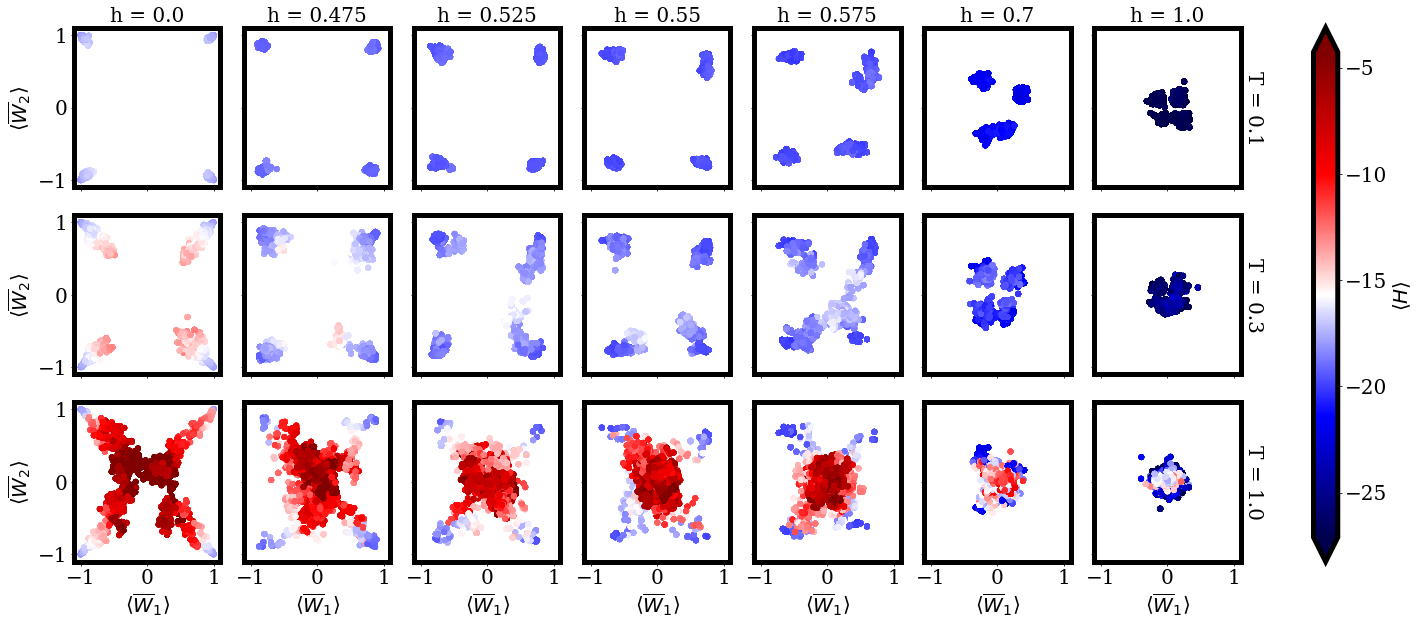

In [35]:
fig = ens_est_ds.isel({'h':[0, 3, 4, 5, 6, 9, 10], 'iter':0}).plot.scatter(
    x='ev_WLX_mean', y='ev_WLY_mean', col='h', row='T', hue='ev_ham',
    cmap='seismic', markersize='iter',
    vmin=np.percentile(ens_est_ds['ev_ham'].values, 2),
    vmax=np.percentile(ens_est_ds['ev_ham'].values, 98),
    linewidth=0, marker='o', edgecolor="none", add_legend=False)
fig.set_xlabels(r"$\langle \overline{W}_1\rangle$")
fig.set_ylabels(r"$\langle \overline{W}_2\rangle$")
fig.cbar.set_label(label=r'$\langle H\rangle$', size=20, weight='bold')